# Telecom Churn - Group Case Study

The high level aim of the analysis is to identify:
1. Customers at high risk of churn 
2. The main indicators of churn

### Table Of Content:
1. [Problem Overview](#Problem-Overview)
2. [Solution Overview](#Solution-Overview)
3. [Importing Libraries](#Importing-Libraries)
4. [Importing Dataset](#Importing-Dataset)
5. [Understanding Dataset](#Understanding-Dataset)
6. [Preparing Dataset](#Preparing-Dataset)
7. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
8. [Handling Class Imbalance](#Handling-Class-Imbalance)
9. [Dataset Split and Scale](#Dataset-Split-and-Scale)
10. [Identifying customers at high risk of churn](#Identifying-customers-at-high-risk-of-churn)
    * [Dimentionality Reduction using PCA](#Dimentionality-Reduction-using-PCA)
    * [Using Logistic Regression to actually identify customers at high risk of churn](#Using-Logistic-Regression-to-actually-identify-customers-at-high-risk-of-churn)
    * [Using SVM to actually identify customers at high risk of churn](#Using-SVM-to-actually-identify-customers-at-high-risk-of-churn)
    * [Using Random Forest to actually identify customers at high risk of churn](#Using-Random-Forest-to-actually-identify-customers-at-high-risk-of-churn)


11. [Identifying the main indicators of churn](#Identifying-the-main-indicators-of-churn)
    * [Using Logistic Regression to identify indicators of churn](#Using-Logistic-Regression-to-identify-indicators-of-churn)
    * [Using Decision Trees to identify indicators of churn](#Using-Decision-Trees-to-identify-indicators-of-churn)
    * [Using Random Forest to identify the indicators of churn](#Using-Random-Forest-to-identify-the-indicators-of-churn)


12. [Recommendation of strategies to manage customer churn](#Recommendation-of-strategies-to-manage-customer-churn)

----

### Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

----

### Solution Overview

We will follow the following suggestive steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

----

### Importing Libraries

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# do an inline so that plt.show() is not required everytime
%matplotlib inline

# import for pre-processing
# scale (this is same as standard scalar)
from sklearn.preprocessing import scale
# label encoding
from sklearn.preprocessing import LabelEncoder

# import for model selection:
# splitting data into training, test data and validation data
from sklearn.model_selection import train_test_split
# Import for scaling dataframe
from sklearn.preprocessing import StandardScaler
# import for creating K-folds
from sklearn.model_selection import KFold
# import for CV using folds created
from sklearn.model_selection import cross_val_score
# import for grid search cv for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# import for report of model performance (useful for classification models)
from sklearn import metrics
# import for Stratified K fold
from sklearn.model_selection  import StratifiedKFold
# import for Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
#import for SVM
from sklearn import svm
# import for Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Checking version of imported libraries
np.__version__, pd.__version__, sns.__version__

('1.16.2', '0.24.2', '0.9.0')

In [3]:
# Making miscellaneous setting for better experience
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)

----

### Importing Dataset

In [4]:
# Importing the 'telecom_churn_data.csv' dataset
df_data = pd.read_csv('telecom_churn_data.csv')

----

### Understanding Dataset

In [5]:
# Understanding the dataset | Shape
df_data.shape

(99999, 226)

In [6]:
# Understanding the dataset | Meta Data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Understanding the dataset | Data Content
df_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
# Understanding the dataset | Sample Data
df_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [9]:
# Understanding the dataset | Missing Values
sum(df_data.isnull().sum())

3594931

**Summary of Dataset Understanding:**
1. Dataset is not clean (many missing values)
2. Dataset is large (99999 rows and 226 columns)
3. Dataset is mixed (179 columns are float64, 35 columns are int64, 12 columns are object)
4. Dataset contains insignificant columns (several columns have single value)
5. All Dates are in MM/DD/YYYY format

----

### Preparing Dataset

In [10]:
# Dropping Duplicate Values
df_data.drop_duplicates(inplace=True)

# Dropping Rows with all NaN values
df_data.dropna(how='all', axis=0, inplace=True)

In [11]:
# Function to Impute for all 4 months
def impute_for_4_months(attribute, value):
    df_data[attribute+'_6'].fillna(value, inplace=True)
    df_data[attribute+'_7'].fillna(value, inplace=True)
    df_data[attribute+'_8'].fillna(value, inplace=True)
    df_data[attribute+'_9'].fillna(value, inplace=True)

In [12]:
# Imputing important columns (columns with recharge, voice usage and data usage information)

impute_for_4_months('count_rech_2g', 0)
impute_for_4_months('count_rech_3g', 0)
impute_for_4_months('av_rech_amt_data', 0)
impute_for_4_months('total_rech_data', 0)
impute_for_4_months('total_rech_amt', 0)
impute_for_4_months('max_rech_data', 0)
impute_for_4_months('total_og_mou', 0)
impute_for_4_months('total_ic_mou', 0)
impute_for_4_months('vol_2g_mb', 0)
impute_for_4_months('vol_3g_mb', 0)

In [13]:
df_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [14]:
# correcting name of 4 columns where month is mentioned in column name instead of month number:

df_data['vbc_3g_6']=df_data['jun_vbc_3g']
df_data['vbc_3g_7']=df_data['jul_vbc_3g']
df_data['vbc_3g_8']=df_data['aug_vbc_3g']
df_data['vbc_3g_9']=df_data['sep_vbc_3g']

df_data = df_data.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g'], axis=1)

In [15]:
# total Data revenue of the subscriber:
df_data['total_rev_data_6']=df_data['arpu_3g_6']+df_data['arpu_2g_6']+df_data['vbc_3g_6']
df_data['total_rev_data_7']=df_data['arpu_3g_7']+df_data['arpu_2g_7']+df_data['vbc_3g_7']
df_data['total_rev_data_8']=df_data['arpu_3g_8']+df_data['arpu_2g_8']+df_data['vbc_3g_8']
df_data['total_rev_data_9']=df_data['arpu_3g_9']+df_data['arpu_2g_9']+df_data['vbc_3g_9']

**Identifying high-value customers**

In [16]:
# Those who have recharged with an amount more than or equal to X, 
# Where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

# In order to get accurate average recharge amount, we must filter out inactive customers of good period (end of first 2 months)
df_data = df_data[df_data['last_date_of_month_7'].notna()]

# Computing Data Recharge Amount for 'good' phase (used in computation of high value customer)
df_data['total_rech_amt_data_6'] = df_data['av_rech_amt_data_6']*df_data['total_rech_data_6']
df_data['total_rech_amt_data_7'] = df_data['av_rech_amt_data_7']*df_data['total_rech_data_7']

# Calculating the average recharge of first 2 months (6th and 7th month)
df_data['av_rech']=(df_data['total_rech_amt_6']+df_data['total_rech_amt_7']+df_data['total_rech_amt_data_6']+df_data['total_rech_amt_data_7'])/2

# Computing percentile values for derived column: av_rech
df_data['av_rech'].describe(percentiles=[.25,.5,.70,.90,.95,.99])

count    99398.000000
mean       487.507437
std        871.462693
min          0.000000
25%        129.000000
50%        276.500000
70%        480.000000
90%       1031.500000
95%       1516.000000
99%       3377.015000
max      61236.000000
Name: av_rech, dtype: float64

In [17]:
# Considering 70th percentile as threshold, retaining data for only high-value customer (70%: 480.000000)
df_data=df_data[df_data['av_rech']>=480]

# Computing the count of High-Value Customers
print(f'Count of High-Value Customers: {df_data.shape[0]}')

Count of High-Value Customers: 29865


**Tagging churners and remove attributes of the churn phase**

In [18]:
# Calculating the total usage (voice & Data)
df_data['churn']=df_data['total_og_mou_9']+df_data['total_ic_mou_9']+df_data['vol_2g_mb_9']+df_data['vol_3g_mb_9']
df_data['churn']=df_data['churn'].map(lambda x: 1 if x==0 else 0)

In [19]:
# Churn Rate within our dataframe of High-Value customers
print(f'Churn rate within High-Value Customers: {round(len(df_data[df_data["churn"]>0].index)/len(df_data.index)*100,2)}')

Churn rate within High-Value Customers: 8.03


**Removing all the attributes corresponding to the churn phase**

In [20]:
# Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)
cols = [c for c in df_data.columns if c.lower()[-2:] != '_9']
df_data=df_data[cols]

In [21]:
# Dropping all Date Columns since they do not have any direct significance in analysis
df_data.drop(df_data.select_dtypes(['object']), axis=1, inplace=True)

In [22]:
# Dropping columns with just one unique value
for col in df_data.columns:
    if len(df_data[col].unique()) == 1:
        df_data.drop(col,inplace=True,axis=1)

In [23]:
# Computing the percentage of missing values in each column
(df_data.isnull().sum()/len(df_data.index)).sort_values(ascending=False)

arpu_2g_8                0.467437
night_pck_user_8         0.467437
arpu_3g_8                0.467437
total_rev_data_8         0.467437
fb_user_8                0.467437
arpu_3g_6                0.440549
fb_user_6                0.440549
night_pck_user_6         0.440549
arpu_2g_6                0.440549
total_rev_data_6         0.440549
arpu_2g_7                0.430504
fb_user_7                0.430504
total_rev_data_7         0.430504
night_pck_user_7         0.430504
arpu_3g_7                0.430504
std_ic_t2t_mou_8         0.038272
loc_ic_mou_8             0.038272
loc_og_t2f_mou_8         0.038272
loc_og_t2c_mou_8         0.038272
loc_og_mou_8             0.038272
og_others_8              0.038272
std_og_t2t_mou_8         0.038272
std_og_t2m_mou_8         0.038272
std_og_t2f_mou_8         0.038272
loc_og_t2t_mou_8         0.038272
std_og_t2c_mou_8         0.038272
std_og_mou_8             0.038272
isd_og_mou_8             0.038272
ic_others_8              0.038272
std_ic_t2f_mou

In [24]:
# From the above output, we conclude that many columns have more than 60% NaN values across all rows
# It is not sure that the NaN values actually signifies 0 or missing value in these columns
# Any impact of these columns could only be justified by less than 40% of dataset, hence dropping them

# Dropping all columns with more than 10% NaN values (10% is an arbitrary value and we will try to impute that much NaNs)
# threshold signifies the minimum number of non NaN values to as to keep the column
threshold = int(.9*len(df_data.index))
df_data.dropna(thresh=threshold, axis=1, inplace=True)

In [25]:
# Dropping all rows with any NaN values (NaN values needs to be removed for modelling), removing since we have huge dataset.
df_data.dropna(how='any', axis=0, inplace=True)

In [26]:
# Understanding the processed dataset | Shape
df_data.shape

(28401, 153)

In [27]:
# Computing the percentage of missing values in each column
(df_data.isnull().sum()/len(df_data.index)).sort_values(ascending=False)

churn                    0.0
std_og_mou_7             0.0
spl_og_mou_8             0.0
spl_og_mou_7             0.0
spl_og_mou_6             0.0
isd_og_mou_8             0.0
isd_og_mou_7             0.0
isd_og_mou_6             0.0
std_og_mou_8             0.0
std_og_mou_6             0.0
std_ic_t2t_mou_8         0.0
std_og_t2c_mou_8         0.0
std_og_t2c_mou_7         0.0
std_og_t2c_mou_6         0.0
std_og_t2f_mou_8         0.0
std_og_t2f_mou_7         0.0
std_og_t2f_mou_6         0.0
std_og_t2m_mou_8         0.0
og_others_6              0.0
og_others_7              0.0
og_others_8              0.0
total_og_mou_6           0.0
std_ic_t2t_mou_6         0.0
loc_ic_mou_8             0.0
loc_ic_mou_7             0.0
loc_ic_mou_6             0.0
loc_ic_t2f_mou_8         0.0
loc_ic_t2f_mou_7         0.0
loc_ic_t2f_mou_6         0.0
loc_ic_t2m_mou_8         0.0
loc_ic_t2m_mou_7         0.0
loc_ic_t2m_mou_6         0.0
loc_ic_t2t_mou_8         0.0
loc_ic_t2t_mou_7         0.0
loc_ic_t2t_mou

In [28]:
df_data.isnull().sum()

mobile_number            0
loc_og_t2o_mou           0
std_og_t2o_mou           0
loc_ic_t2o_mou           0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
s

**Deriving new features**

In [29]:
# total_usage_voice means total minutes of usage of voice
df_data['total_usage_voice_6']=df_data['total_og_mou_6']+df_data['total_ic_mou_6']
df_data['total_usage_voice_7']=df_data['total_og_mou_7']+df_data['total_ic_mou_7']
df_data['total_usage_voice_8']=df_data['total_og_mou_8']+df_data['total_ic_mou_8']

# total_usage_data means total volume (mb) of usage of data
df_data['total_usage_data_6']=df_data['vol_2g_mb_6']+df_data['vol_3g_mb_6']
df_data['total_usage_data_7']=df_data['vol_2g_mb_7']+df_data['vol_3g_mb_7']
df_data['total_usage_data_8']=df_data['vol_2g_mb_8']+df_data['vol_3g_mb_8']


In [30]:
df_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_6,vbc_3g_7,vbc_3g_8,total_rech_amt_data_6,total_rech_amt_data_7,av_rech,churn,total_usage_voice_6,total_usage_voice_7,total_usage_voice_8,total_usage_data_6,total_usage_data_7,total_usage_data_8
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,18.74,19.38,57.74,0.0,0.0,1185.0,1,1113.99,1167.28,778.90,0.00,0.00,0.00
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,122.16,910.65,21.03,0.0,354.0,696.0,0,612.22,460.15,188.10,0.00,1106.95,11.97
21,70

**Summary:**
* Count of High-Value Customers: 29865
* Churn rate within High-Value Customers: 8.03
* After cleaning the dataset, we are left with 28401 rows

----

### Exploratory Data Analysis

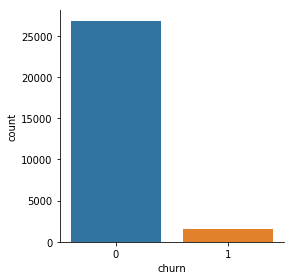

In [31]:
# Checking class imbalance
sns.catplot(x="churn", kind="count", data=df_data, height=4, aspect=1)

In [32]:
def num_col_univariate_analysis(c):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(y=c, data=df_data)
    plt.show()

In [33]:
def num_col_bivariate_analysis(c1,c2):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(x=c1, y=c2, data=df_data)
    plt.show()

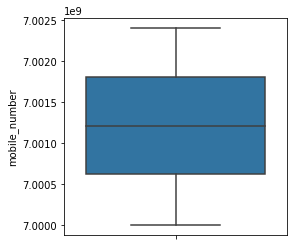

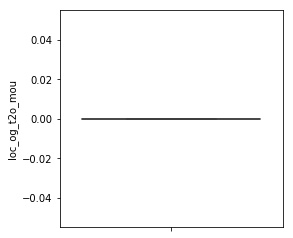

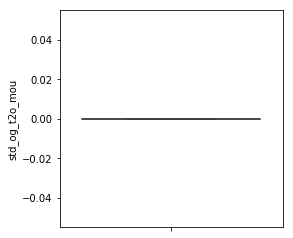

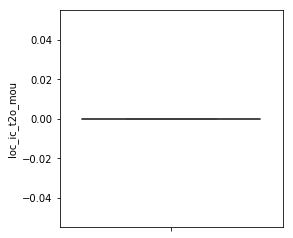

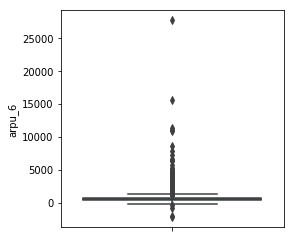

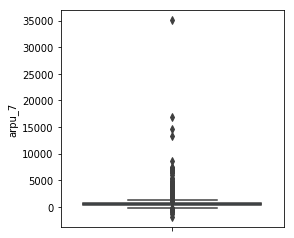

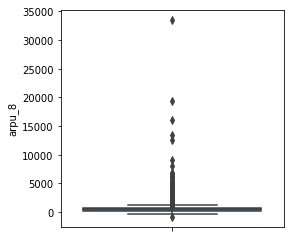

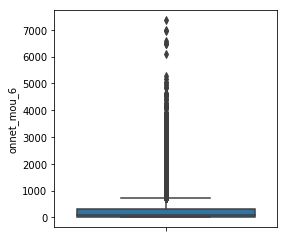

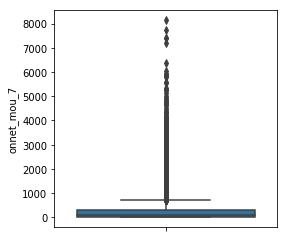

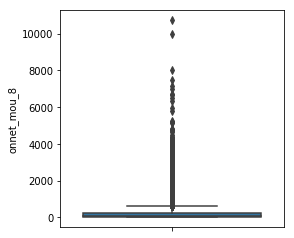

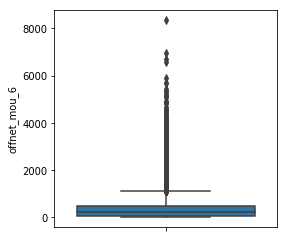

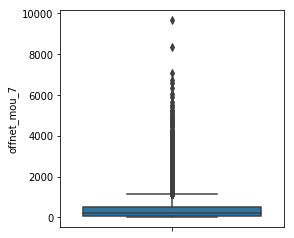

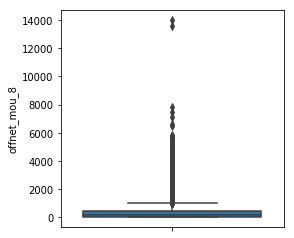

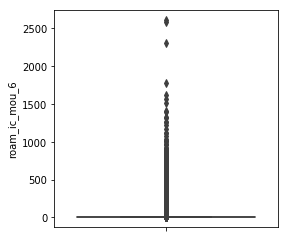

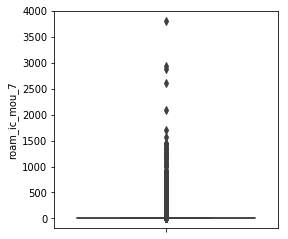

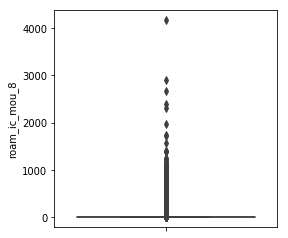

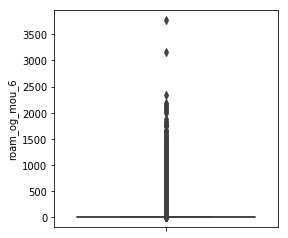

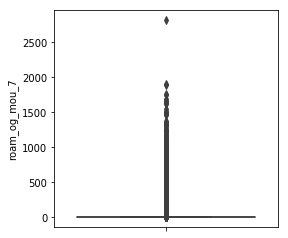

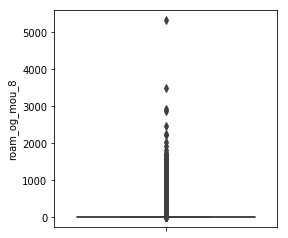

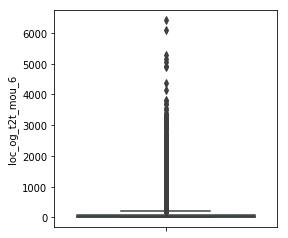

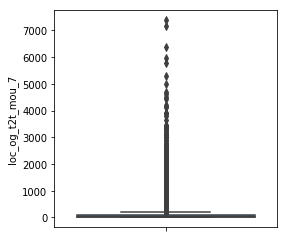

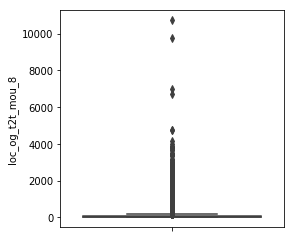

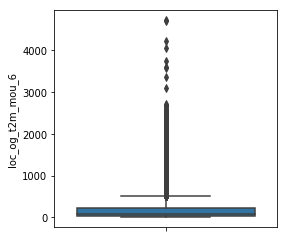

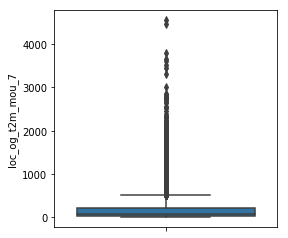

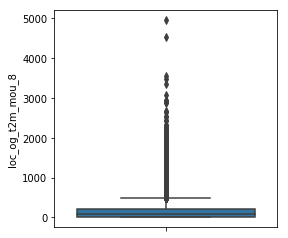

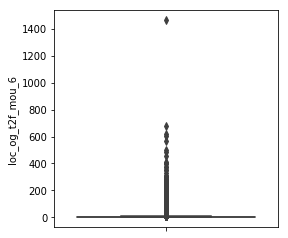

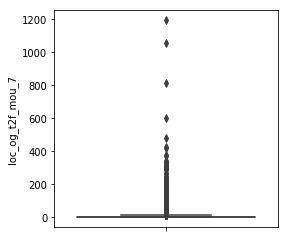

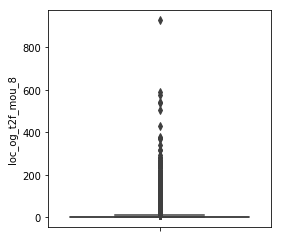

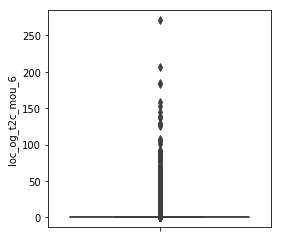

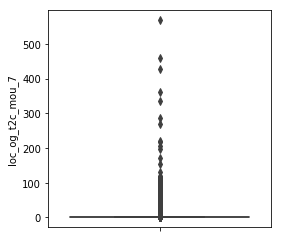

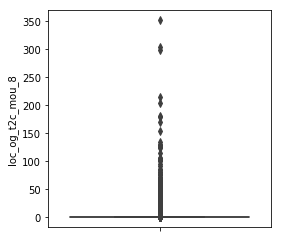

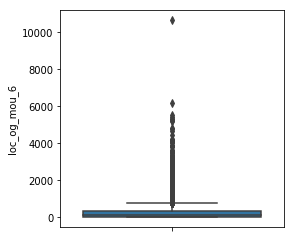

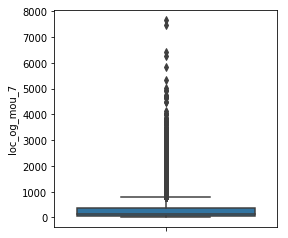

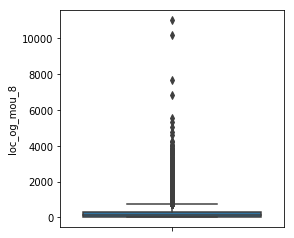

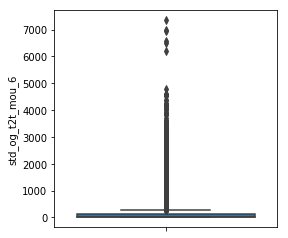

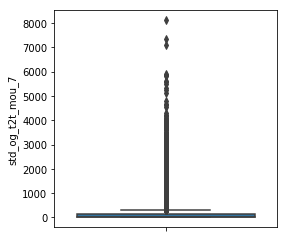

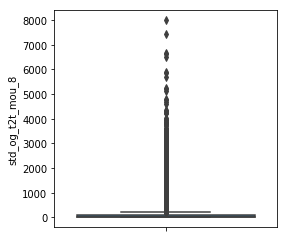

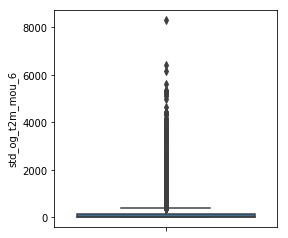

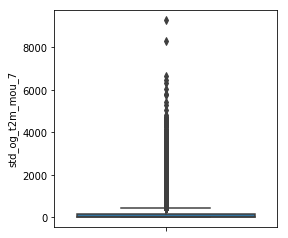

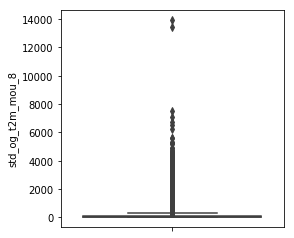

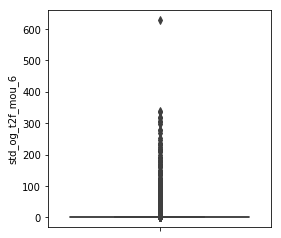

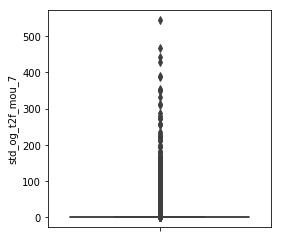

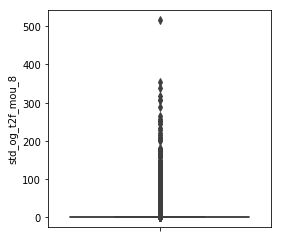

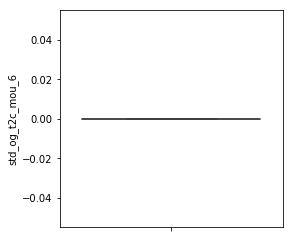

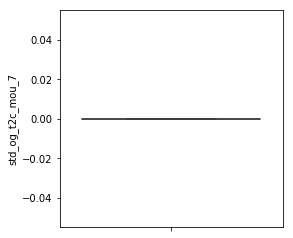

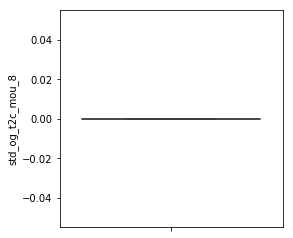

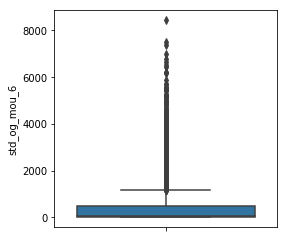

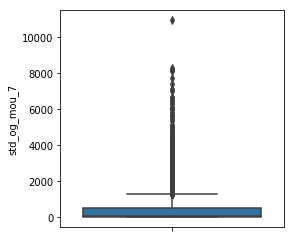

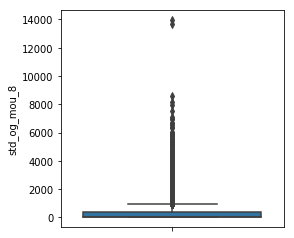

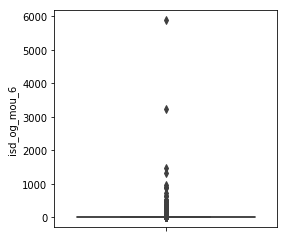

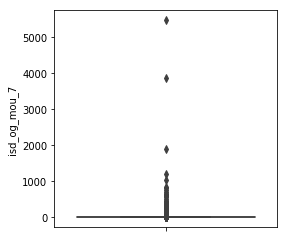

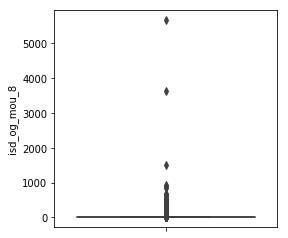

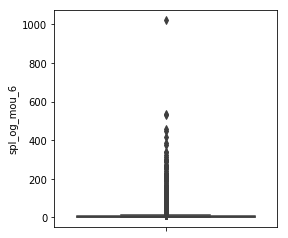

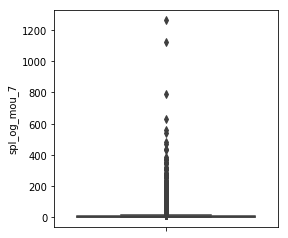

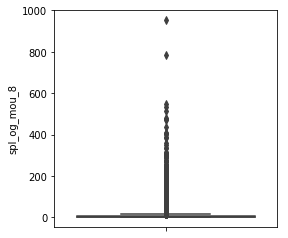

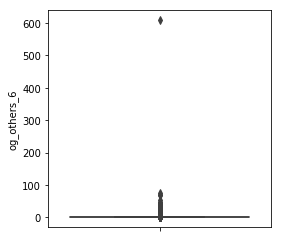

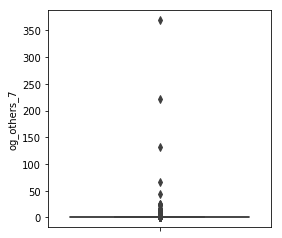

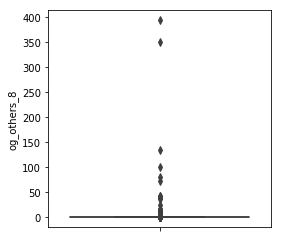

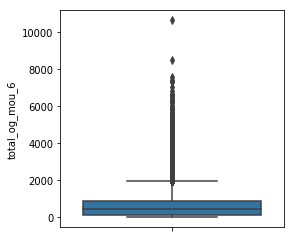

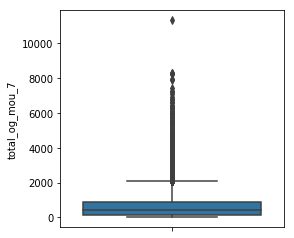

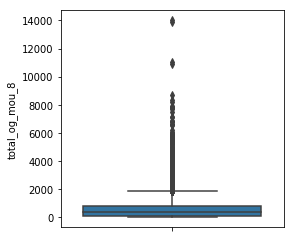

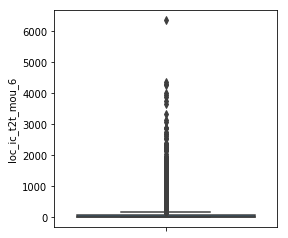

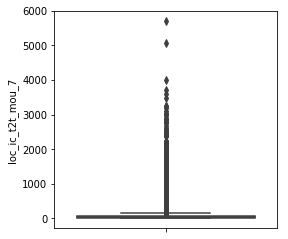

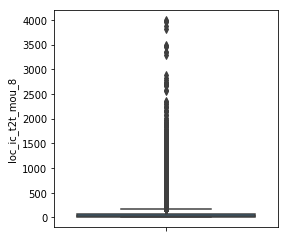

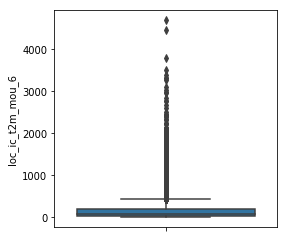

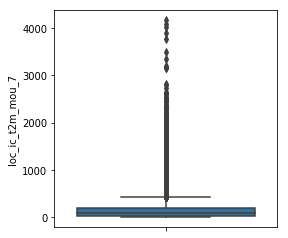

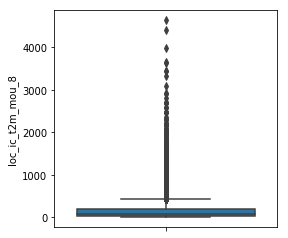

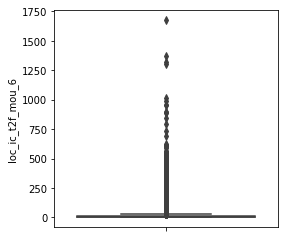

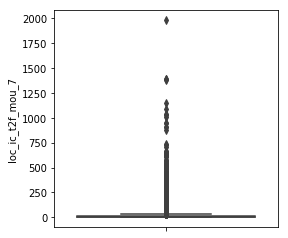

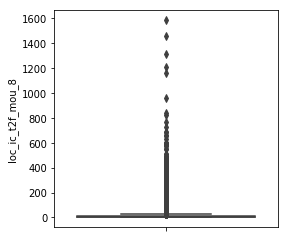

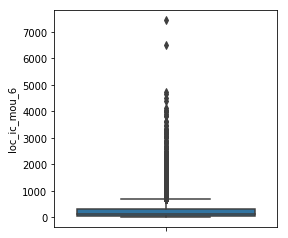

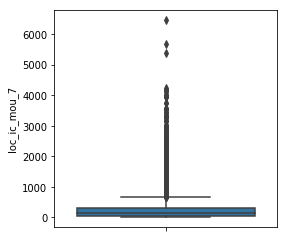

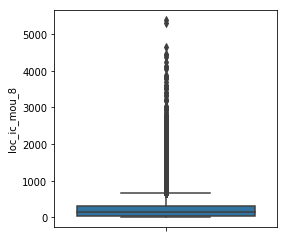

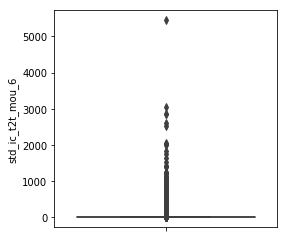

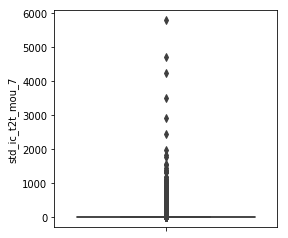

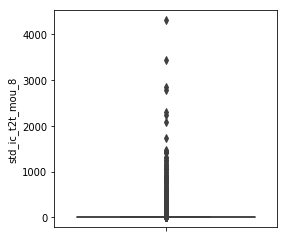

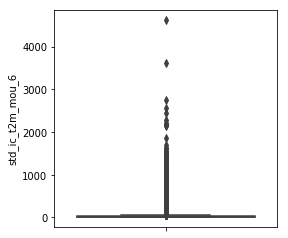

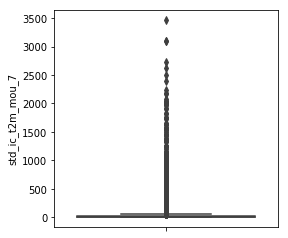

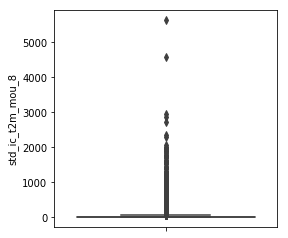

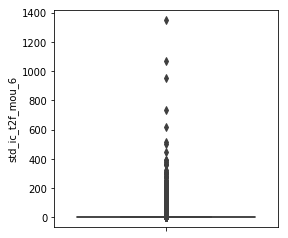

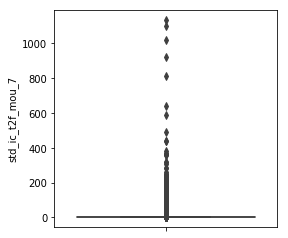

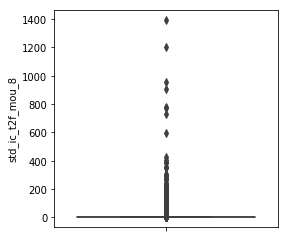

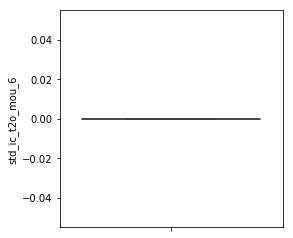

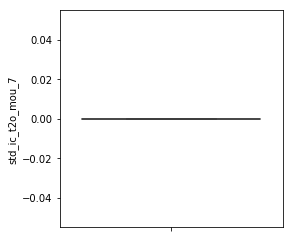

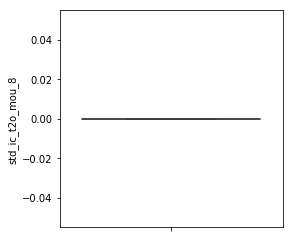

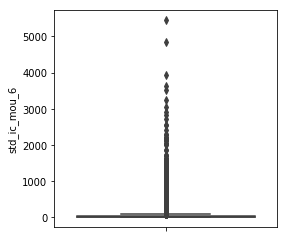

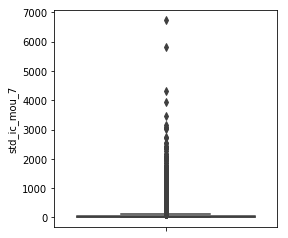

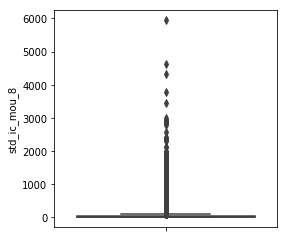

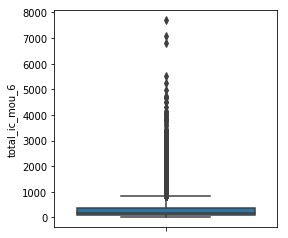

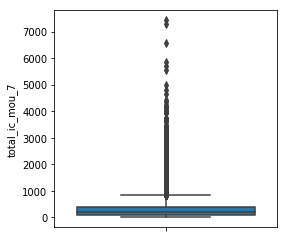

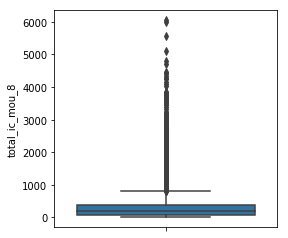

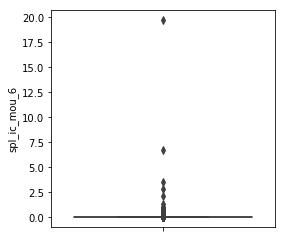

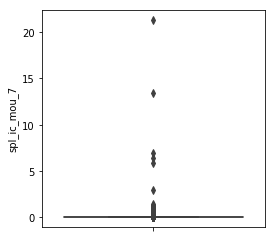

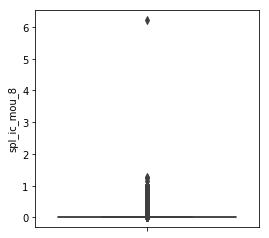

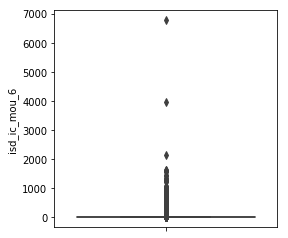

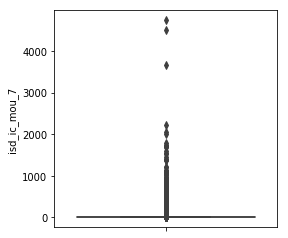

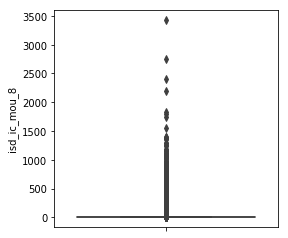

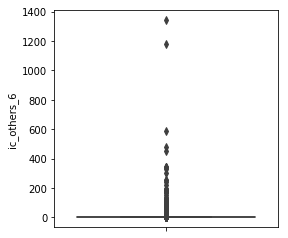

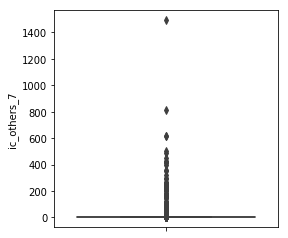

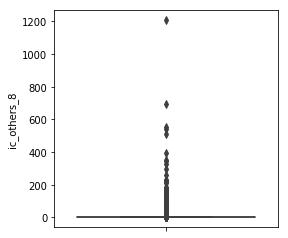

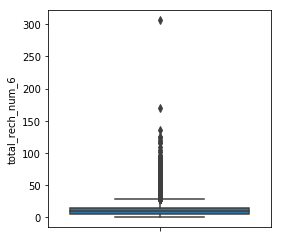

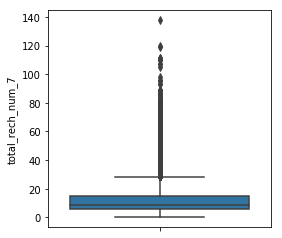

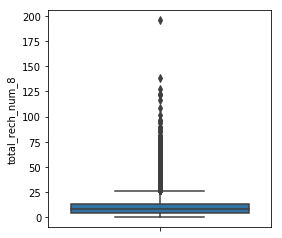

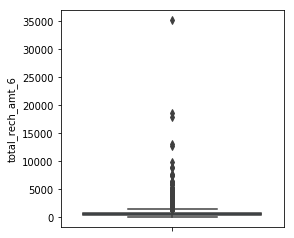

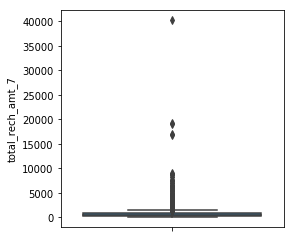

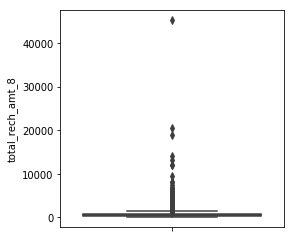

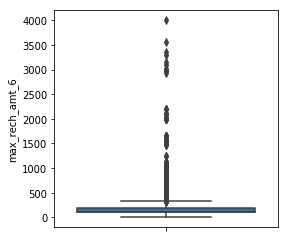

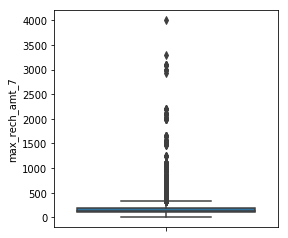

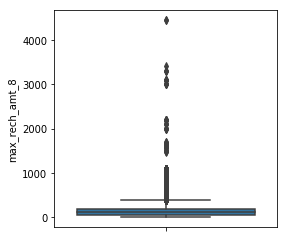

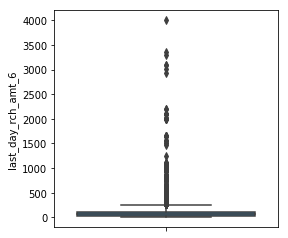

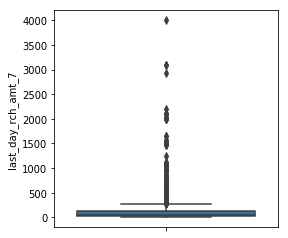

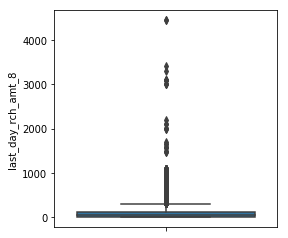

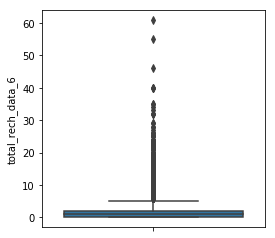

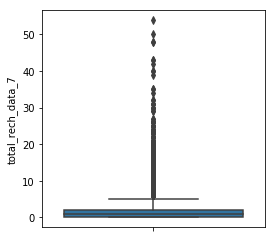

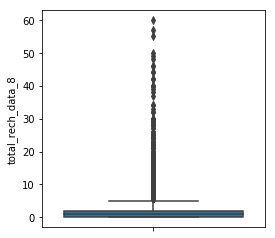

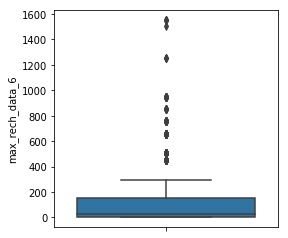

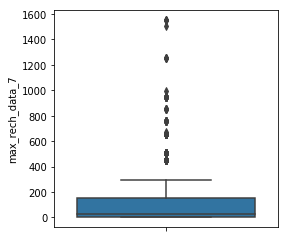

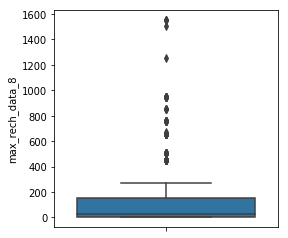

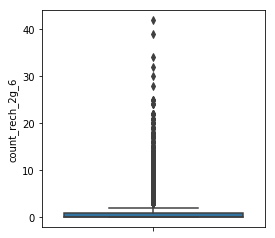

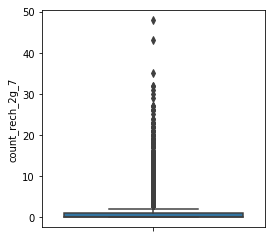

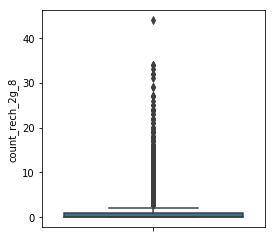

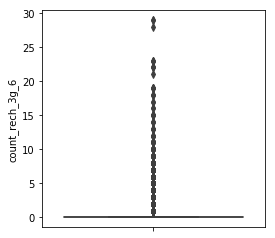

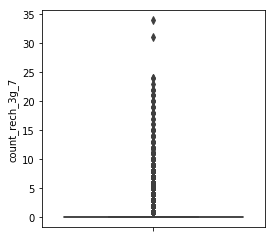

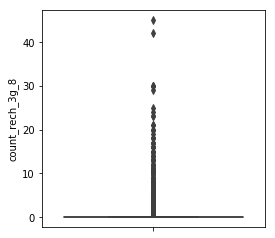

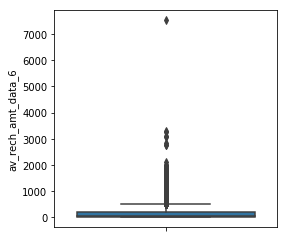

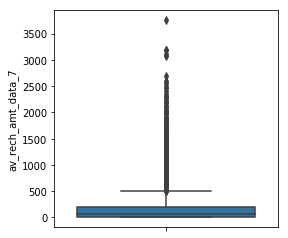

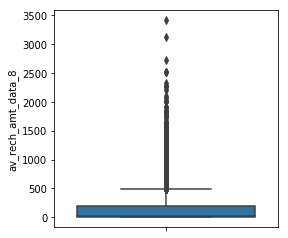

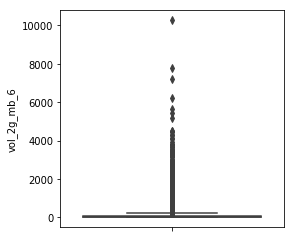

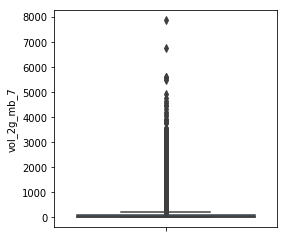

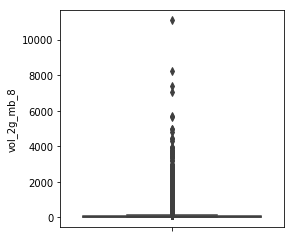

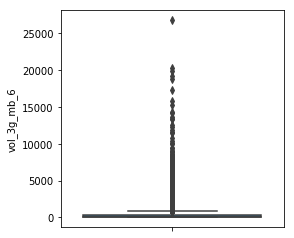

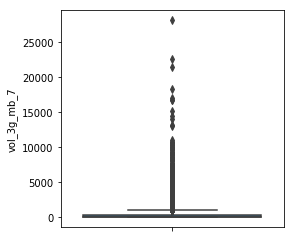

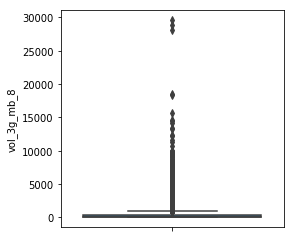

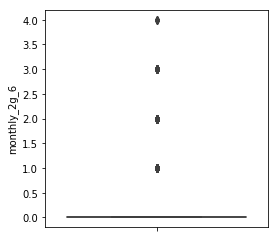

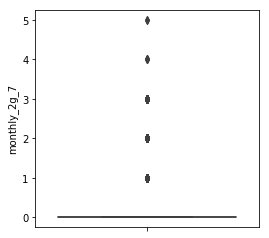

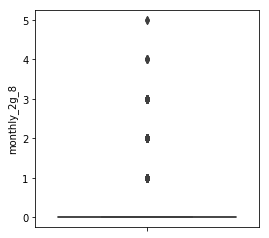

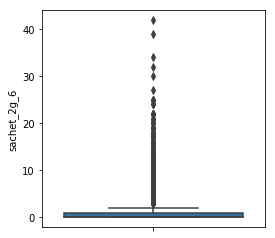

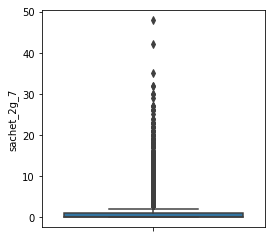

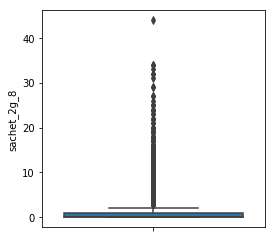

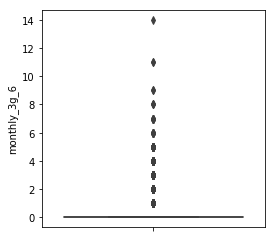

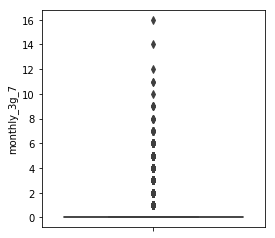

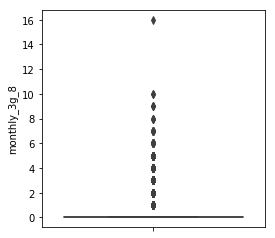

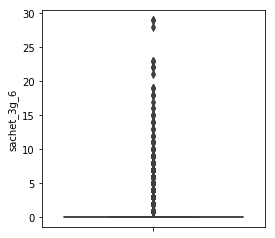

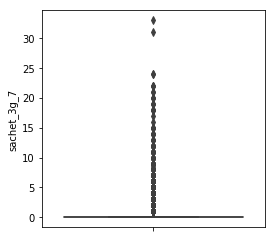

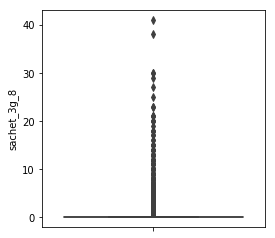

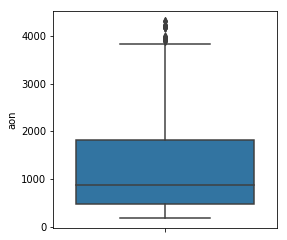

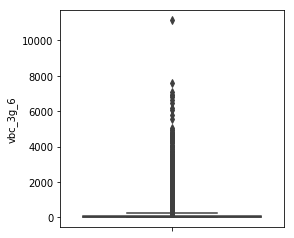

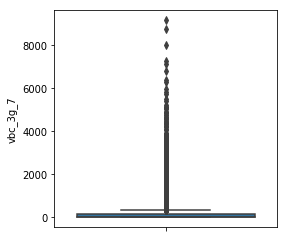

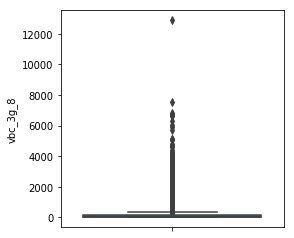

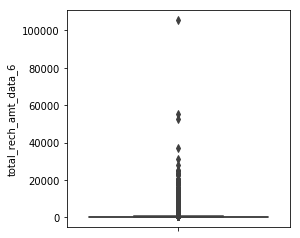

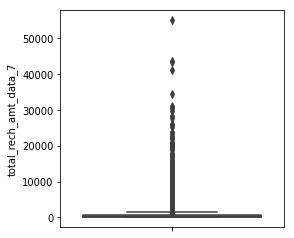

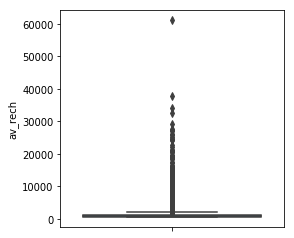

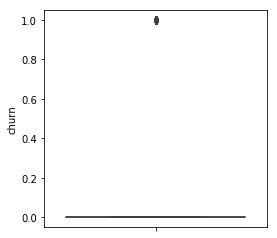

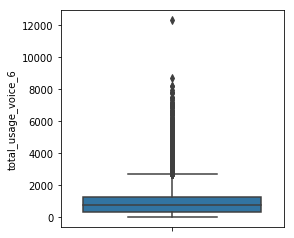

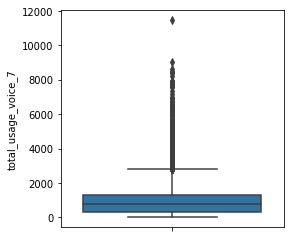

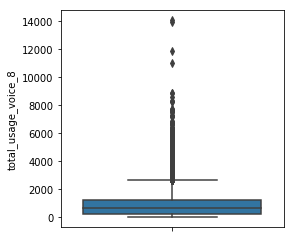

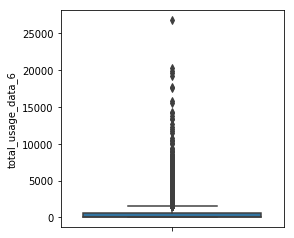

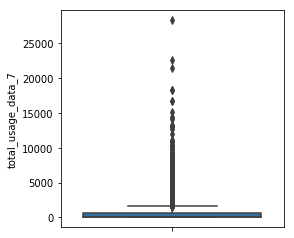

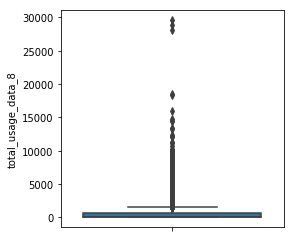

In [34]:
# Univariate Analysis of Numerical Columns
processes = []
for c in df_data.columns:
    num_col_univariate_analysis(c)

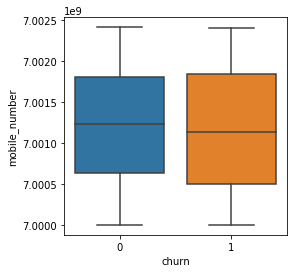

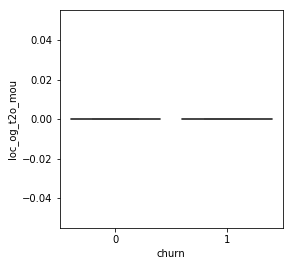

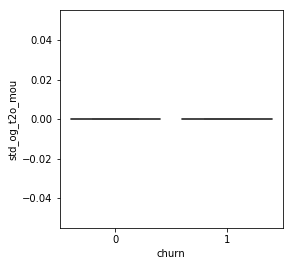

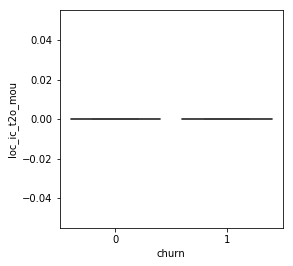

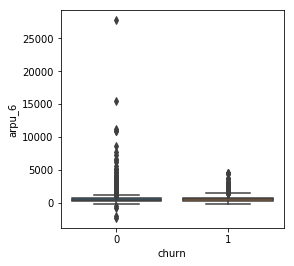

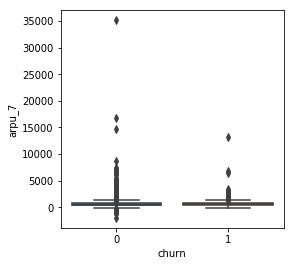

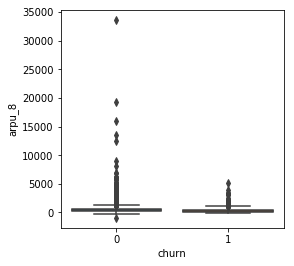

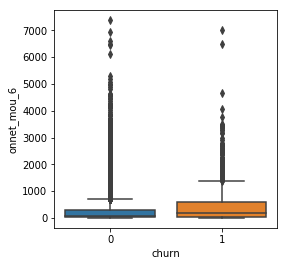

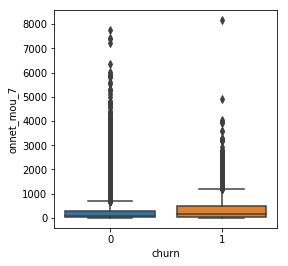

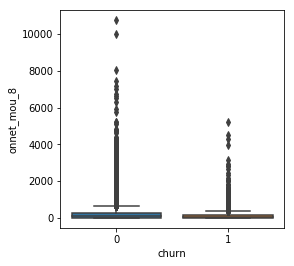

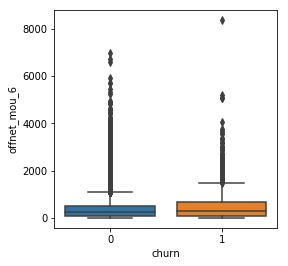

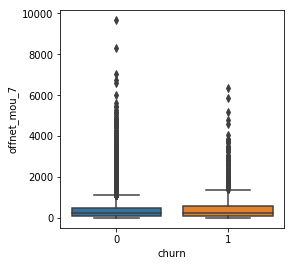

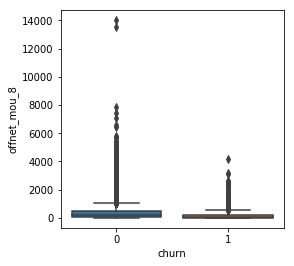

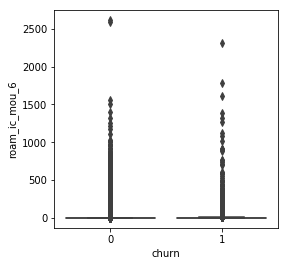

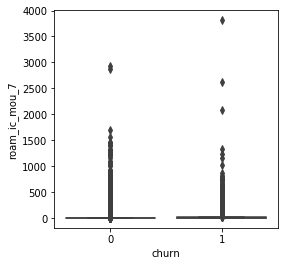

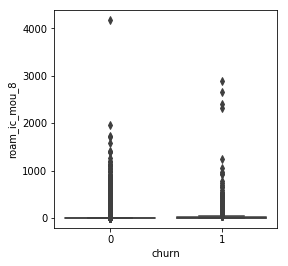

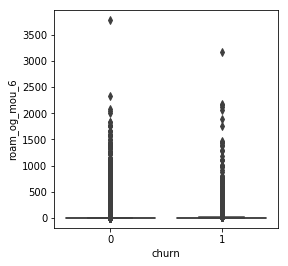

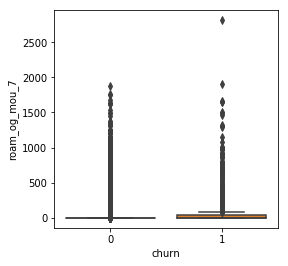

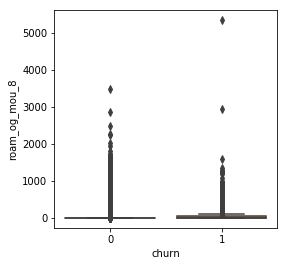

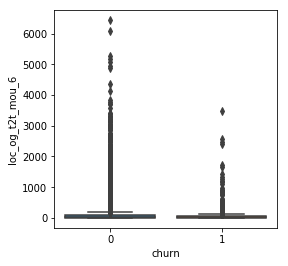

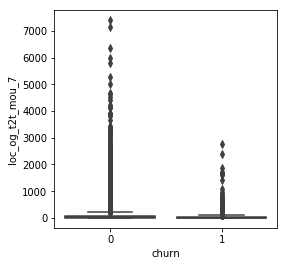

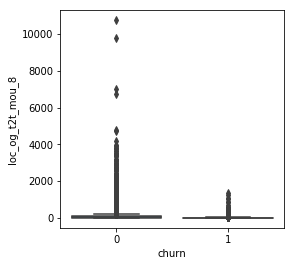

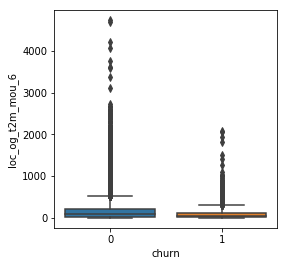

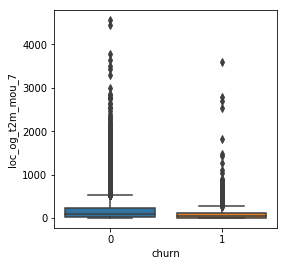

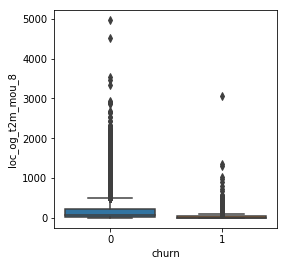

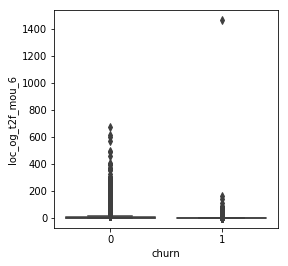

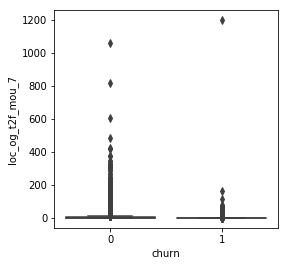

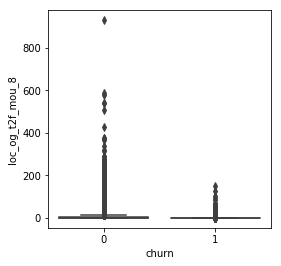

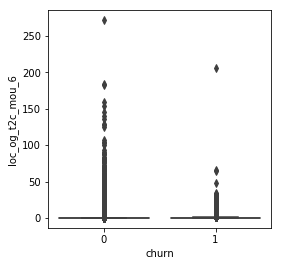

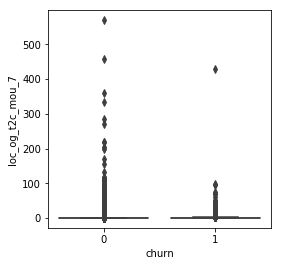

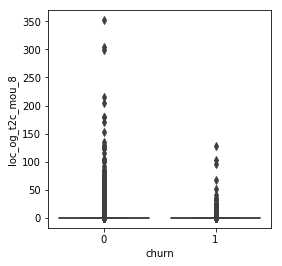

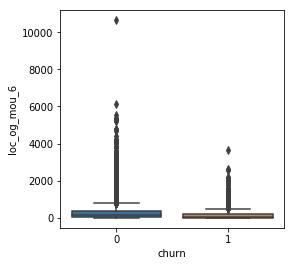

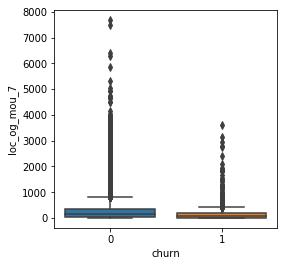

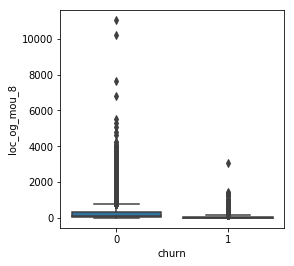

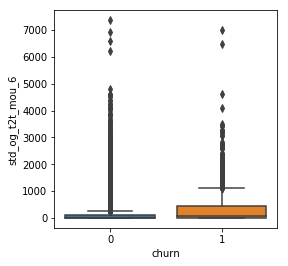

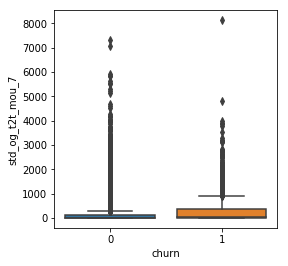

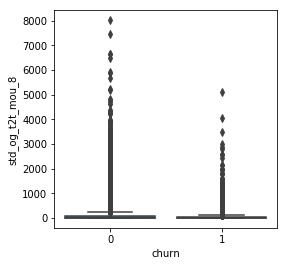

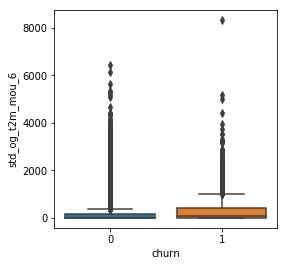

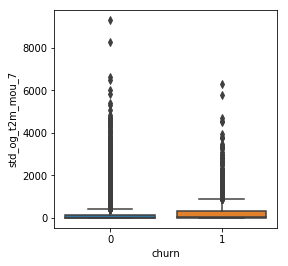

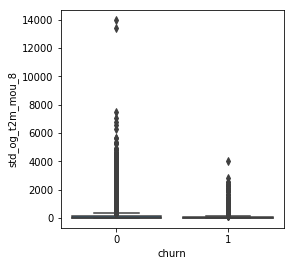

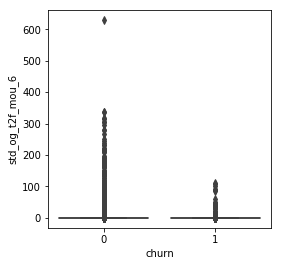

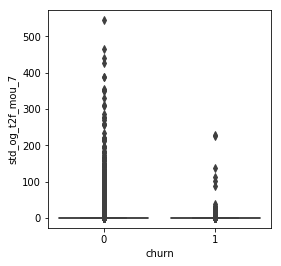

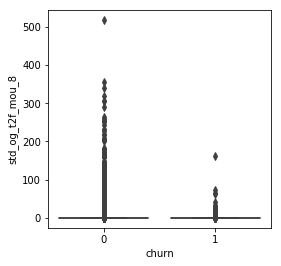

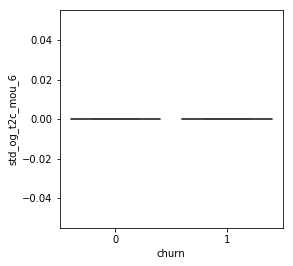

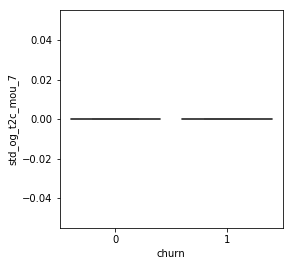

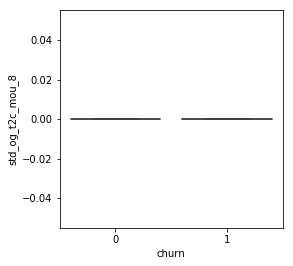

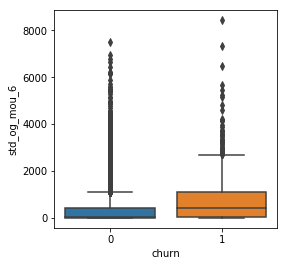

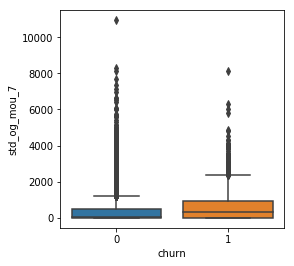

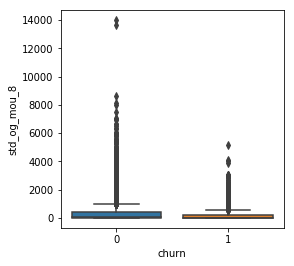

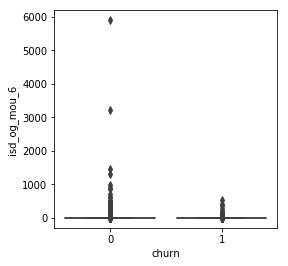

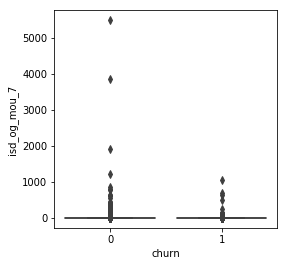

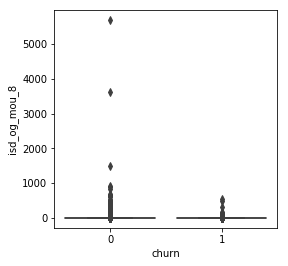

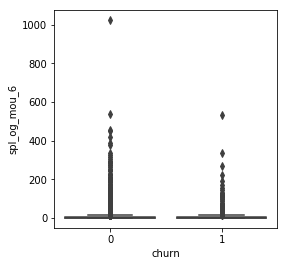

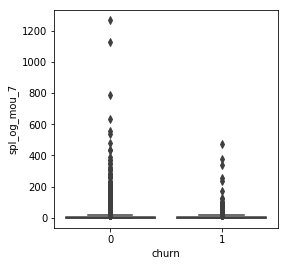

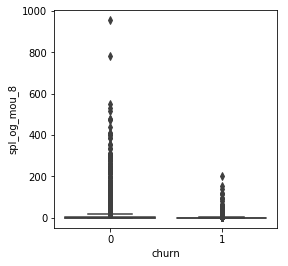

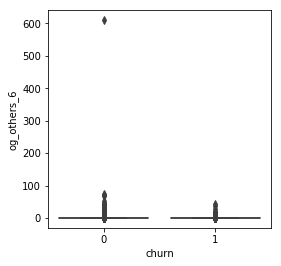

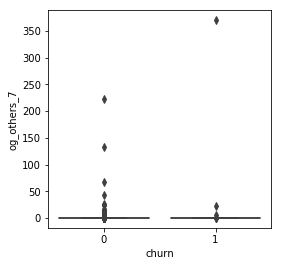

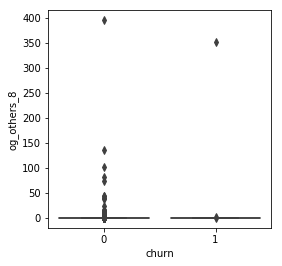

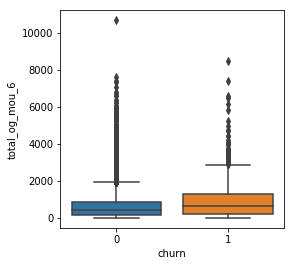

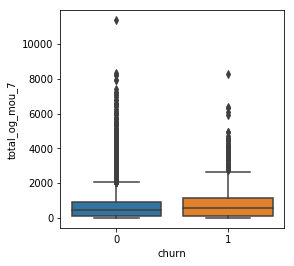

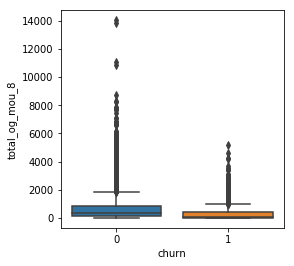

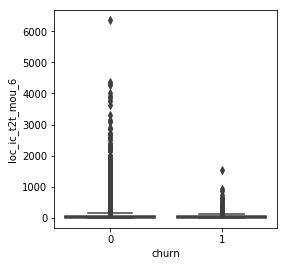

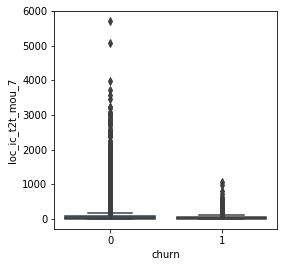

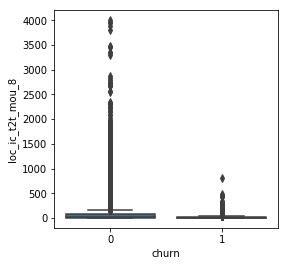

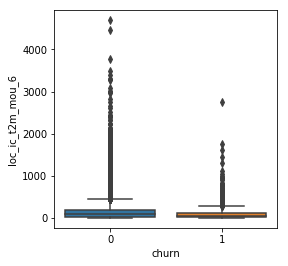

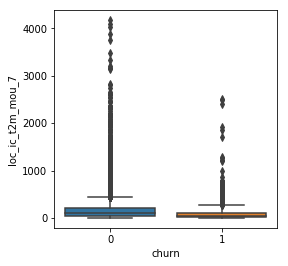

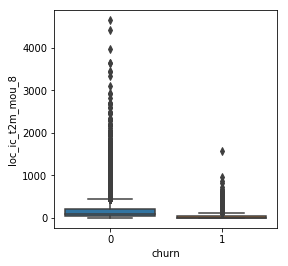

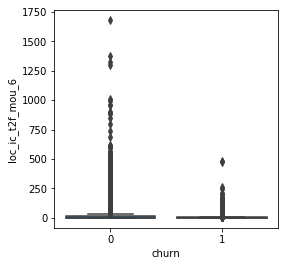

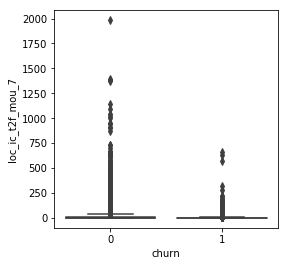

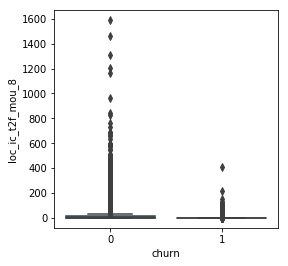

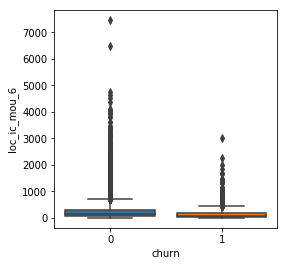

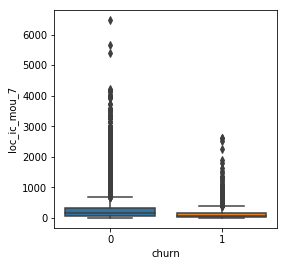

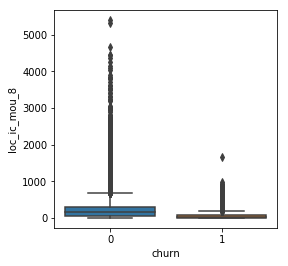

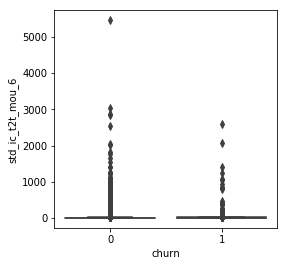

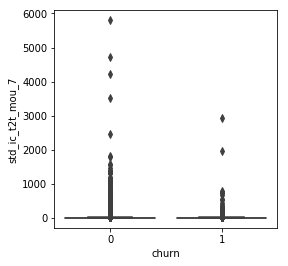

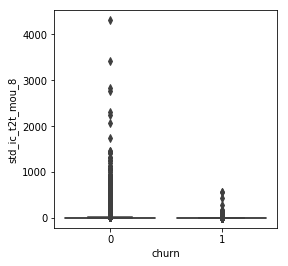

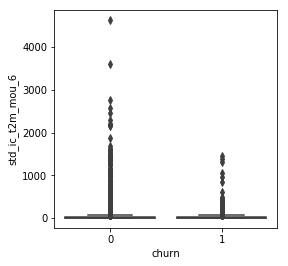

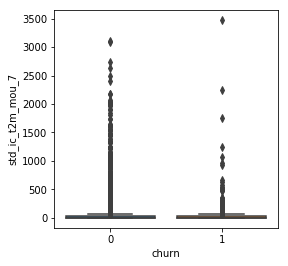

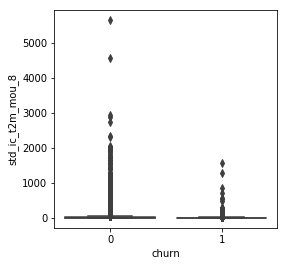

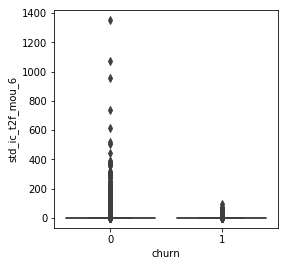

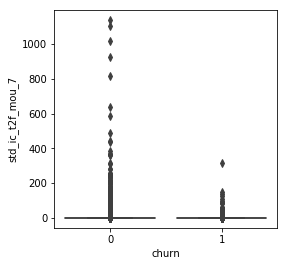

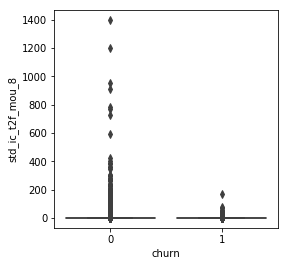

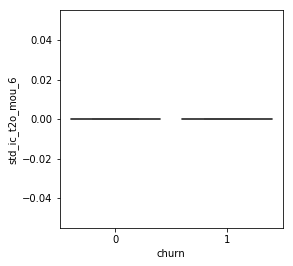

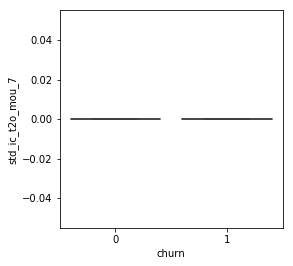

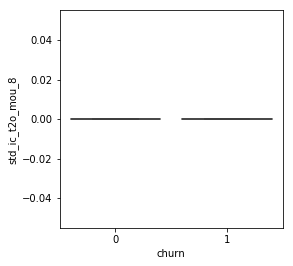

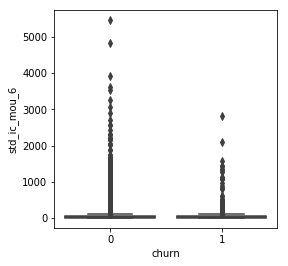

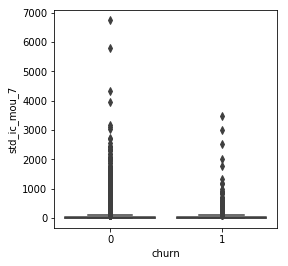

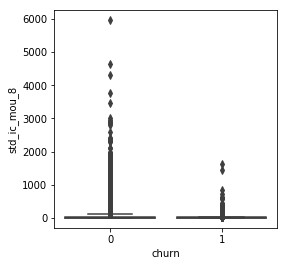

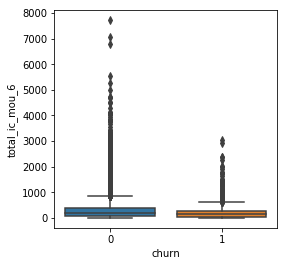

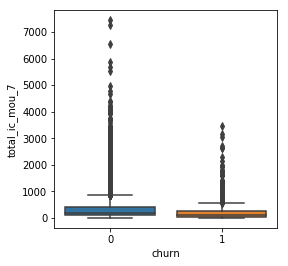

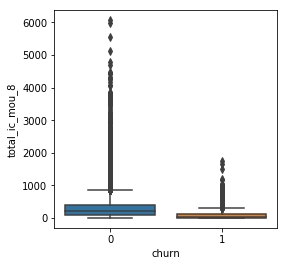

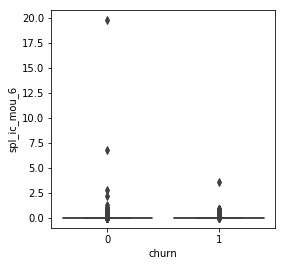

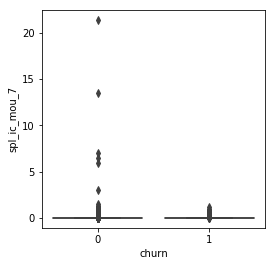

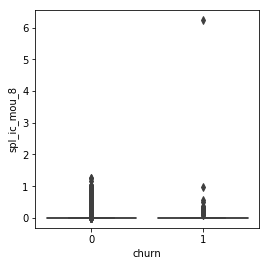

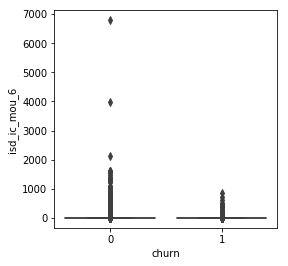

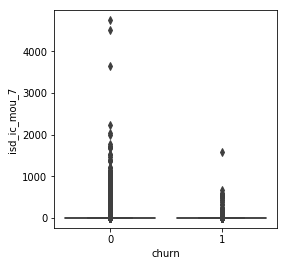

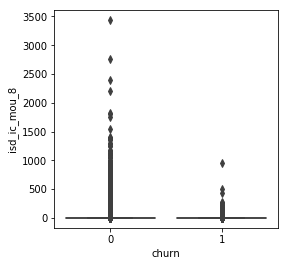

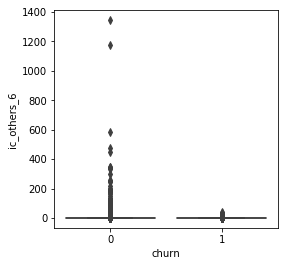

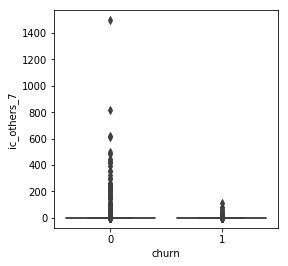

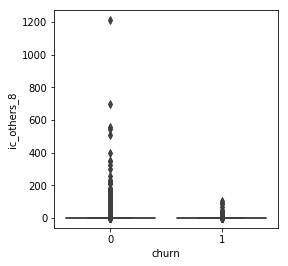

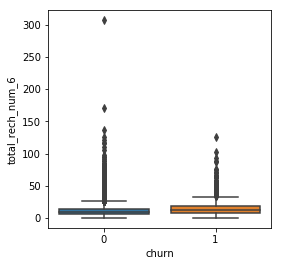

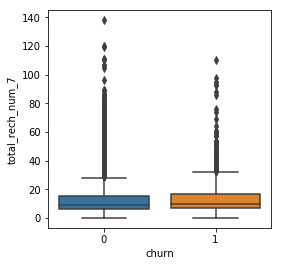

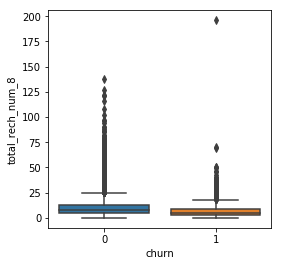

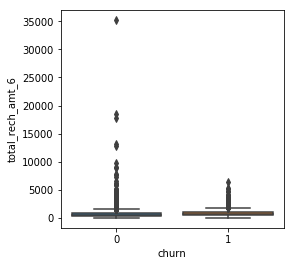

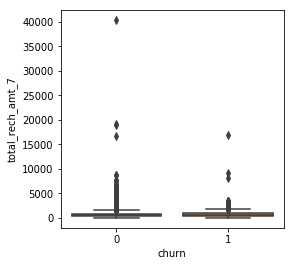

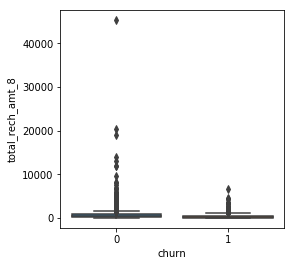

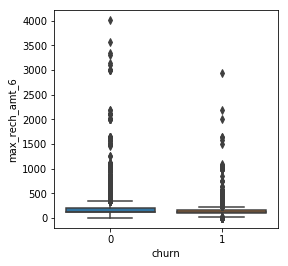

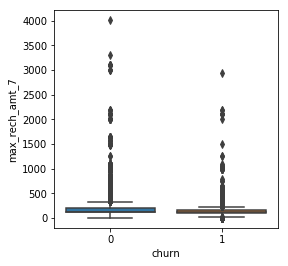

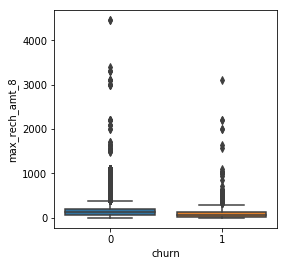

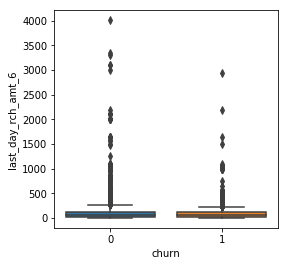

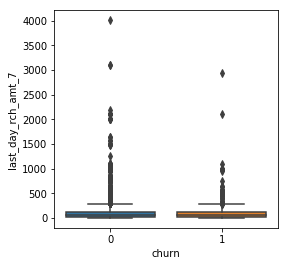

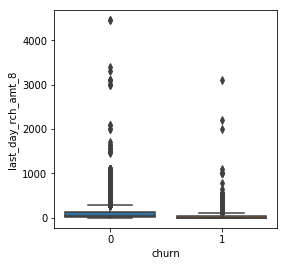

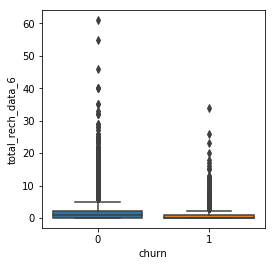

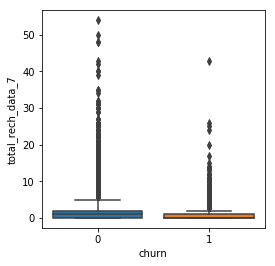

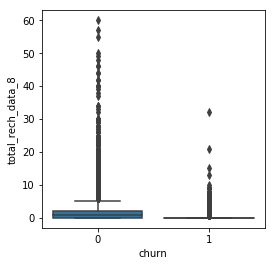

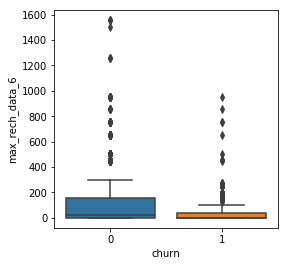

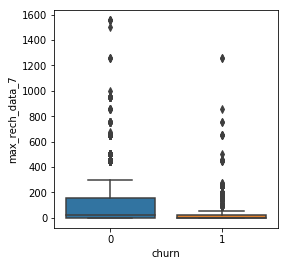

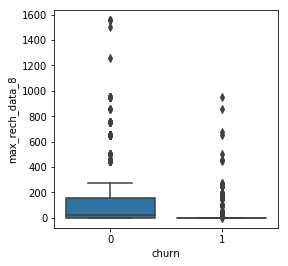

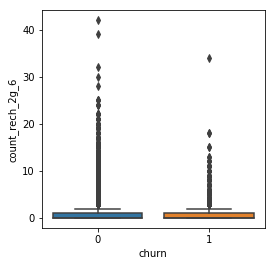

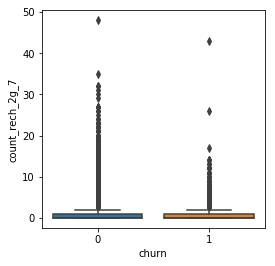

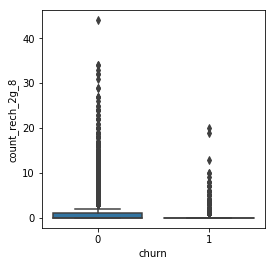

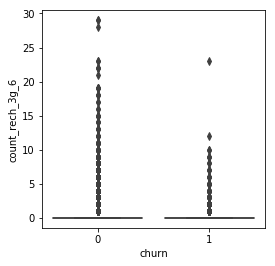

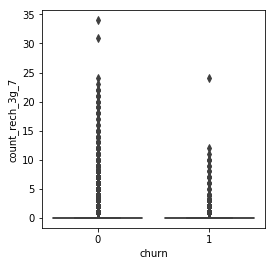

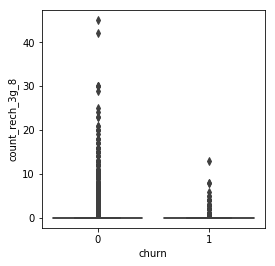

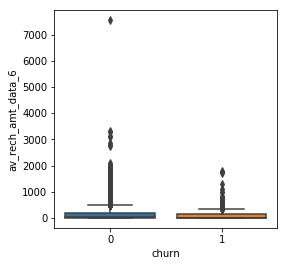

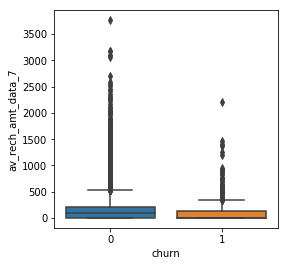

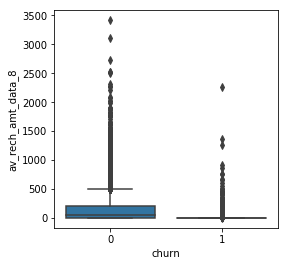

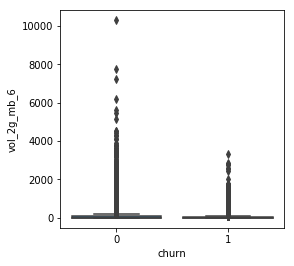

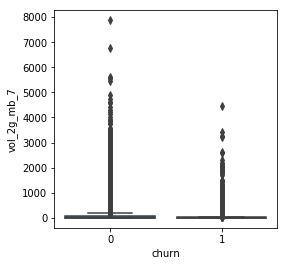

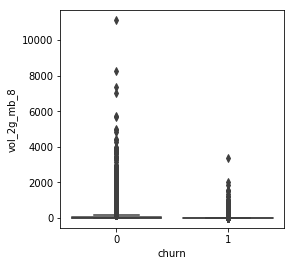

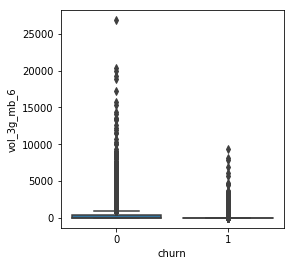

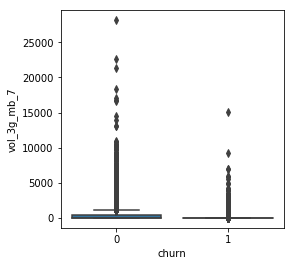

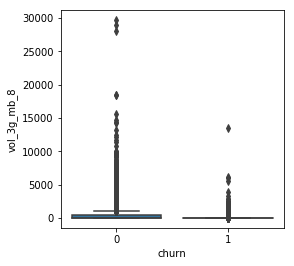

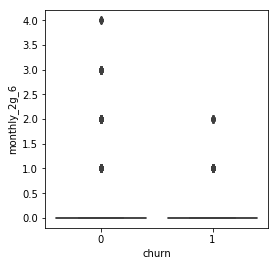

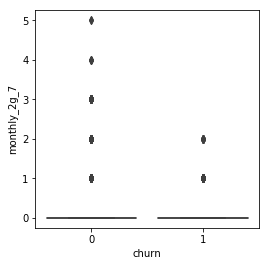

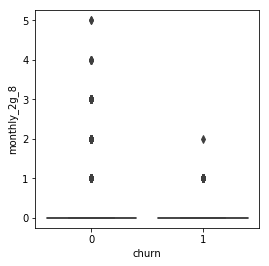

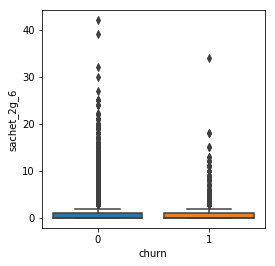

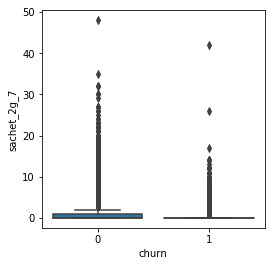

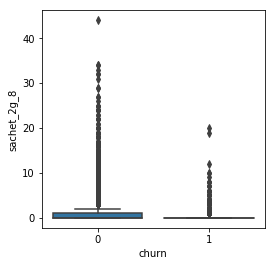

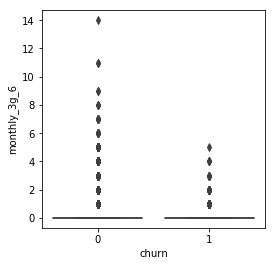

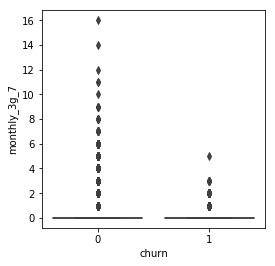

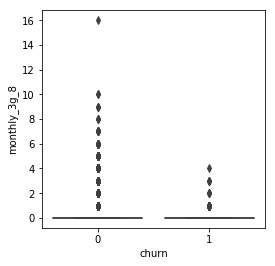

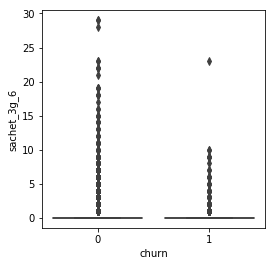

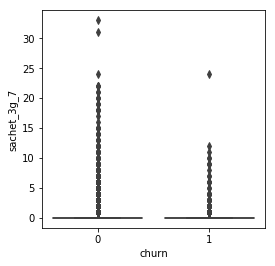

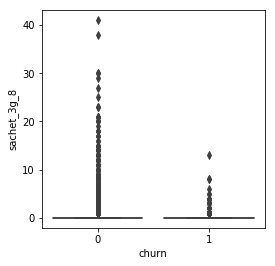

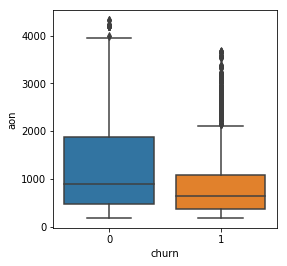

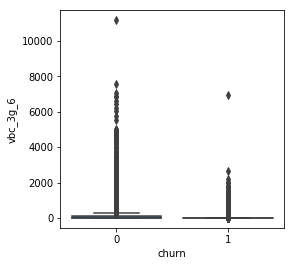

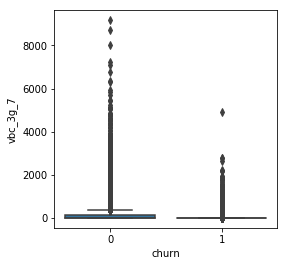

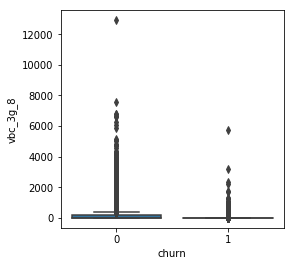

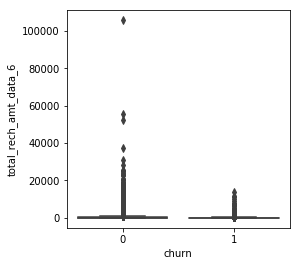

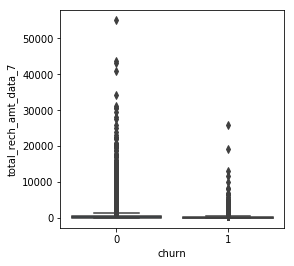

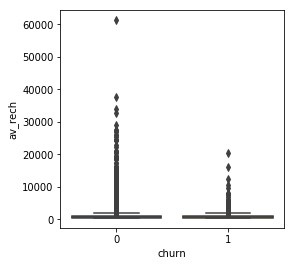

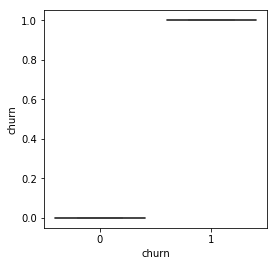

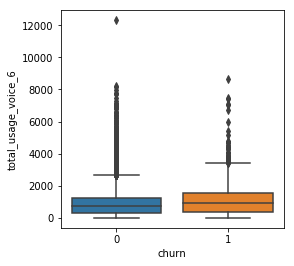

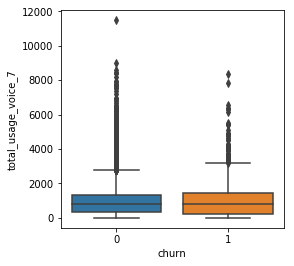

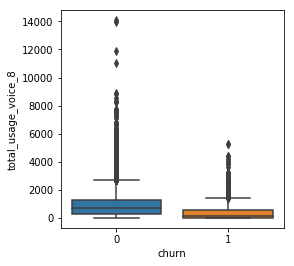

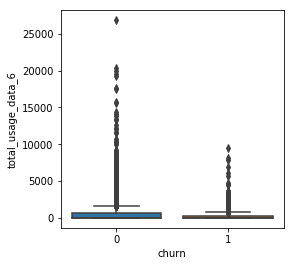

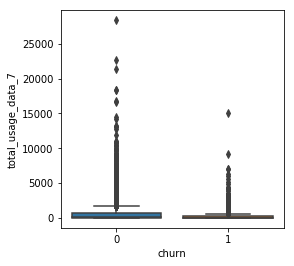

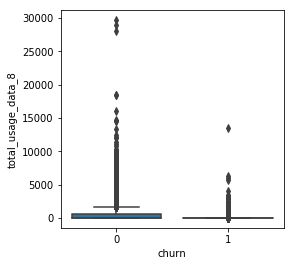

In [35]:
# Bivariate Analysis of Numerical Columns
for c in df_data.columns:
    num_col_bivariate_analysis('churn',c)

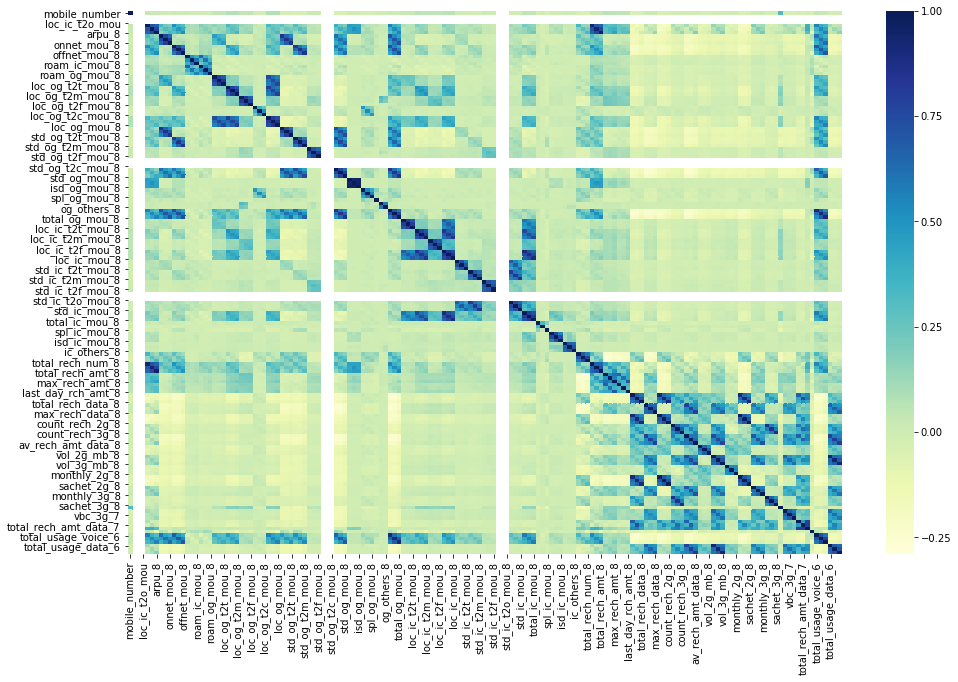

In [36]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(16, 10))
sns.heatmap(df_data.corr(), cmap="YlGnBu",annot=False)

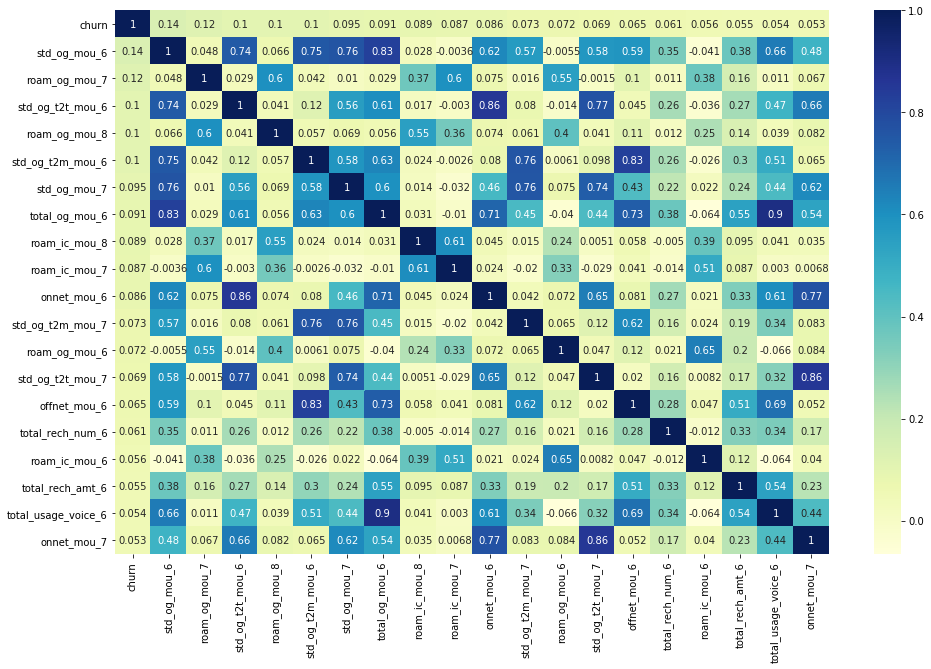

In [37]:
# Visualizing the correlation between major columns
k = 20 #number of variables for heatmap
corrmat = df_data.corr()
cols = corrmat.nlargest(k, 'churn')['churn'].index
plt.figure(figsize=(16, 10))
sns.heatmap(df_data[cols].corr(), cmap="YlGnBu",annot=True)

**Summary:**
* There is a **major class imbalance**, and thus model built directly might be biased towards non-churn
* Univariate Analysis conveys that there are a lot of attributes which have very **less variation**
* Bivariate Analysis clearly reveals that
    1. max_rech_data is related to churn
    2. av_rech_amount is related to churn
    3. aon is related to churn
    4. total_usage_voice is related to churn
    5. total_usage_data is realted to churn
* Heatmaps clearly reveals that
    1. A lot of columns are related (and we can see patterns in heatmap), hence multicollinearity exist
    2. None of the column have significant relation with the churn

----

### Handling Class Imbalance

There are multiple ways of handling class imbalance. Some of them are:
* Up-sample the minority class
* Down-sample the majority class
* Change your performance metric
* Penalize algorithms (cost-sensitive training)
* Use tree-based algorithms

We will be using **Up-sample the minority class** in order to handle class imbalance

In [38]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_data[df_data.churn==0]
df_minority = df_data[df_data.churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=26819,   # to match majority class
                                 random_state=123)  # reproducible results
 
# Combine majority class with upsampled minority class
df_data = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_data.churn.value_counts()

1    26819
0    26819
Name: churn, dtype: int64

----

### Dataset Split and Scale

In [39]:
# splitting dataframe into X and y
X = df_data.drop(['churn'], axis = 1)
y = df_data['churn']
print(X.shape)
print(y.shape)

(53638, 158)
(53638,)


In [40]:
# Splitting the data into Train, Validation and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37546, 158)
(37546,)
(16092, 158)
(16092,)


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(26282, 158)
(26282,)
(11264, 158)
(11264,)


In [42]:
# Scalling the features of Train Dataset, Validation Dataset and Test Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Scaling Validation Dataset
scaler = scaler.fit(X_val)
X_val = scaler.transform(X_val)

# Scaling Test Dataset
scaler = scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [43]:
# Checking class imbalance across the splitted dataframes
print(y_train.describe())
print(y_val.describe())
print(y_test.describe())

count    26282.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: churn, dtype: float64
count    11264.000000
mean         0.500000
std          0.500022
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: churn, dtype: float64
count    16092.000000
mean         0.500000
std          0.500016
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: churn, dtype: float64


This ensures that our datasets too do not have any class imbalance (to avoid incorrect model training/evaluation)

Now we will approach the analysis in 2 parts, i.e.
1. identifying customers at high risk of churn
2. identifying the main indicators of churn

----

### Identifying customers at high risk of churn

We will perform the following steps:
1. Dimentionality Reduction using PCA
2. Using Logistic Regression to actually identify customers at high risk of churn
3. Using SVM to actually identify customers at high risk of churn

----

### Dimentionality Reduction using PCA

In [44]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [45]:
#Doing the PCA on the train data
pca.fit(df_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

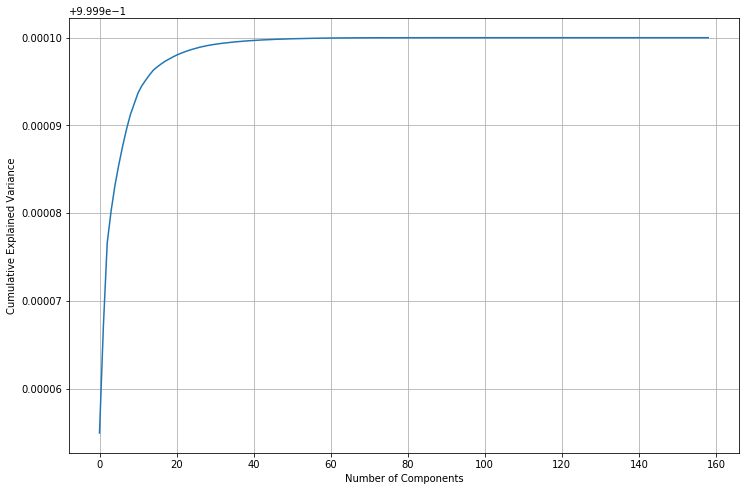

In [46]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [47]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
# Since accuracy is a major concern, we will go with ~ 100% (i.e. 40 PC)
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [48]:
# Getting Reduced Dimentional Data
df_data_pca = pca_final.fit_transform(df_data)
df_data_pca = pd.DataFrame(df_data_pca)
df_data_pca['churn'] = df_data['churn'].values
df_data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,churn
0,3.351306e+05,517.237280,-1252.149071,59.269174,518.004130,-534.252478,295.196323,-532.654248,149.845427,376.691227,-733.893284,-504.193917,891.764448,-396.270709,66.199853,-135.016358,392.578775,75.431124,-60.134635,-178.170257,-162.924458,-13.864320,-184.265355,-31.151921,-166.838858,-29.042611,-0.194755,-97.451299,-100.624711,-14.694072,-32.812932,-30.664021,-140.178464,460.109258,9.104942,-106.956180,-67.695161,17.784493,-9.556374,47.130753,0
1,9.344998e+05,-1487.776453,276.223282,-23.328272,-395.590839,-291.757323,1256.601062,671.811735,-229.992160,-608.639606,-555.052203,-121.931492,-88.543620,-94.436234,-178.436840,-382.344414,-48.171710,50.358017,-16.078675,-45.767089,1.883453,19.663150,-273.383230,-39.214398,-29.185538,-55.977214,-63.349985,-10.374002,9.777915,10.992563,-54.474912,-76.894957,46.259287,29.870807,-33.700546,47.321204,-34.323020,32.913682,-18.802151,-25.247736,0
2,-3.022542e+05,1085.533192,-1550.178010,-687.057057,-29.176620,-581.488268,552.622766,-590.710691,-238.092505,-200.248956,-450.575435,830.777858,129.165888,-155.084845,-316.532500,-69.558502,-269.871353,142.239010,-33.323301,192.949326,161.916966,11.104415,-29.720221,22.264226,50.145361,-1.379892,-87.928014,18.305756,-81.298180,160.214366,-25.453233,155.504751,23.577916,88.942694,65.241436,-28.004975,93.436375,-103.995486,-44.132305,18.532719,0
3,-1.039953e+06,23308.297093,14977.527036,2198.307766,-1.868393,-2385.799904,3760.801482,-9036.230010,-1.544110,-1228.940583,1451.410877,1395.676893,-202.491487,880.160396,-2083.230985,175.990589,-633.271207,202.920311,157.356569,-1421.022580,63.221664,0.230668,134.524243,288.742024,503.424909,615.621136,34.123441,300.246574,367.301280,1405.965085,141.723585,353.906424,-383.354457,1197.866676,512.987406,-119.188935,10.077224,127.459128,46.860563,114.758051,0
4,-3.745131e+05,-699.847888,-1048.962255,-142.670471,-435.592086,-1264.959153,-140.287083,276.358406,214.611661,-176.779562,343.632162,-39.637222,56.648625,-50.619420,-192.381956,474.845399,-127.942645,99.126659,103.415651,-99.605262,-149.294476,-9.639883,-60.821369,-100.930394,-37.706460,-10.864771,-12.062494,17.367676,-25.266019,10.732541,-10.085208,0.091340,-13.769503,-19.754413,50.764107,-5.408131,-109.243248,0.403957,-1.089347,4.642937,0


In [49]:
# splitting dataframe into X_pca and y_pca
X_pca = df_data_pca.drop(['churn'], axis = 1)
y_pca = df_data_pca['churn']
print(X_pca.shape)
print(y_pca.shape)

(53638, 40)
(53638,)


In [50]:
# Splitting the data into Train, Validation and Test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, stratify=y_pca, random_state=100)
print(X_train_pca.shape)
print(y_train_pca.shape)
print(X_test_pca.shape)
print(y_test_pca.shape)

(37546, 40)
(37546,)
(16092, 40)
(16092,)


In [51]:
# Scaling the PCA Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train_pca)
X_train_pca = scaler.transform(X_train_pca)

# Scaling Test Dataset
scaler = scaler.fit(X_test_pca)
X_test_pca = scaler.transform(X_test_pca)

---

### Using Logistic Regression to actually identify customers at high risk of churn

In [52]:
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(X_train_pca,y_train_pca)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=100, refit=True, scoring='accuracy', solver='saga',
           tol=0.0001, verbose=0)

In [53]:
# Evaluation on Test Dataset
predictions = searchCV.predict(X_test_pca)

# Detailed report of classification done by model
print(metrics.classification_report(y_test_pca, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test_pca, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test_pca, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8046
           1       0.80      0.81      0.80      8046

   micro avg       0.80      0.80      0.80     16092
   macro avg       0.80      0.80      0.80     16092
weighted avg       0.80      0.80      0.80     16092

Accuracy for the test dataset 80.2%
ROC for the test dataset 80.2%


**Summary:**
* As per our business requirement, accuracy and precision parameters could be decent 
* As per our business requirement, we need the recall parameter for churn=1 to be ideally 100%
* Our current model gives decent accuracy and precision, however recall for churn = 1 is poor, hence moving to next model



---

### Using SVM to actually identify customers at high risk of churn

In [54]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.LinearSVC(random_state=100, dual=False, class_weight='balanced')

In [55]:
# Train on Training Dataset
svm_rbf.fit(X_train_pca, y_train_pca)

LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=100, tol=0.0001,
     verbose=0)

In [56]:
# Predict on Test Dataset
predictions = svm_rbf.predict(X_test_pca)

In [57]:
# accuracy 
print(metrics.accuracy_score(y_true=y_test_pca, y_pred=predictions))
#recall
print(metrics.recall_score(y_true=y_test_pca, y_pred=predictions))

0.7997141436738752
0.8124533929903057


In [58]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':list(np.power(10.0, np.arange(-10, 10)))}

# instantiate a model 
svc_grid_search = svm.LinearSVC(random_state=100, dual=False, class_weight='balanced')

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy', n_jobs=-1)

In [59]:
# Training the Model using Train Dataset
clf.fit(X_train_pca, y_train_pca)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=100, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.094747,0.003550,0.006315,4.701341e-04,1e-10,{'C': 1e-10},0.795302,0.789310,0.792952,0.792521,0.002465,16,0.790451,0.793128,0.793145,0.792241,0.001266
1,0.103057,0.006111,0.004988,1.410234e-03,1e-09,{'C': 1e-09},0.795302,0.789310,0.792952,0.792521,0.002465,16,0.790451,0.793128,0.793145,0.792241,0.001266
2,0.106712,0.002936,0.004323,4.691245e-04,1e-08,{'C': 1e-08},0.795302,0.789310,0.792952,0.792521,0.002465,16,0.790451,0.793128,0.793145,0.792241,0.001266
3,0.150267,0.025036,0.004319,4.723310e-04,1e-07,{'C': 1e-07},0.795222,0.789310,0.792952,0.792495,0.002435,19,0.790451,0.793168,0.793225,0.792281,0.001294
4,0.153919,0.018877,0.003990,1.434920e-06,1e-06,{'C': 1e-06},0.795542,0.789230,0.792712,0.792495,0.002581,19,0.790971,0.792649,0.793345,0.792321,0.000996
5,0.204121,0.027929,0.003656,4.691235e-04,1e-05,{'C': 1e-05},0.795062,0.788910,0.794151,0.792708,0.002711,15,0.791011,0.792209,0.794583,0.792601,0.001484
6,0.217751,0.021765,0.004321,4.703592e-04,0.0001,{'C': 0.0001},0.798338,0.791866,0.796708,0.795637,0.002748,14,0.794207,0.796125,0.797339,0.795890,0.001290
7,0.270942,0.027304,0.004322,4.706962e-04,0.001,{'C': 0.001},0.801214,0.792825,0.797507,0.797182,0.003433,1,0.797203,0.797603,0.797419,0.797409,0.000163
8,0.309171,0.035969,0.004654,9.405495e-04,0.01,{'C': 0.01},0.799057,0.793464,0.797587,0.796703,0.002367,13,0.796644,0.797483,0.797699,0.797275,0.000455
9,0.253653,0.010843,0.003991,4.495664e-07,0.1,{'C': 0.1},0.799137,0.793864,0.797667,0.796889,0.002222,2,0.796684,0.797843,0.797739,0.797422,0.000523


In [61]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

We can get accuracy of 0.7971821232621318 using {'C': 0.001}


In [62]:
# Building Final SVM (based on PCA) model
svm_rbf_final = svm.LinearSVC(random_state=100, C=0.001, dual=False, class_weight='balanced')

# Train on Training Dataset
svm_rbf.fit(X_train_pca, y_train_pca)
# Predict on Test Dataset
predictions = svm_rbf.predict(X_test_pca)

# Detailed report of classification done by model
print(metrics.classification_report(y_test_pca, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test_pca, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test_pca, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8046
           1       0.79      0.81      0.80      8046

   micro avg       0.80      0.80      0.80     16092
   macro avg       0.80      0.80      0.80     16092
weighted avg       0.80      0.80      0.80     16092

Accuracy for the test dataset 80.0%
ROC for the test dataset 80.0%


**Summary:**
* SVM model gave decent results
* We have good accuracy and precision values
* The recall for churn = 1 is decent, meaning that our model is able to identify the customers who might churn correctly

----

### Using Random Forest to actually identify customers at high risk of churn

In [63]:
RFC_balanced = RandomForestClassifier(random_state=100, oob_score=True, class_weight="balanced_subsample")

In [64]:
# Training model from Test Dataset
RFC_balanced.fit(X_train_pca,y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=True, random_state=100,
            verbose=0, warm_start=False)

In [65]:
# Making predictions on Test Dataset
predictions=RFC_balanced.predict(X_test_pca)

# Detailed report of classification done by model
print(metrics.classification_report(y_test_pca, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test_pca, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test_pca, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8046
           1       0.99      0.96      0.97      8046

   micro avg       0.97      0.97      0.97     16092
   macro avg       0.97      0.97      0.97     16092
weighted avg       0.97      0.97      0.97     16092

Accuracy for the test dataset 97.0%
ROC for the test dataset 97.0%


In [66]:
# Optimizing Hyperparameters to obtain better results

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 15, 1),
}
# Create a based model
rf = RandomForestClassifier(random_state=100, oob_score=True, class_weight="balanced_subsample")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy', n_jobs = -1,verbose = 5)

In [67]:
# Fit the grid search to the Validation Dataset
grid_search.fit(X_train_pca, y_train_pca)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   14.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=True,
            random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=5)

In [68]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9640441058967666 using {'max_depth': 14}


In [69]:
# Making final model with best parameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(max_depth=14, random_state=100, oob_score=True, class_weight="balanced_subsample")

# Training model from Training Dataset
rfc_final.fit(X_train_pca,y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=True, random_state=100,
            verbose=0, warm_start=False)

In [70]:
# Making predictions on Test Dataset
predictions=rfc_final.predict(X_test_pca)

# Detailed report of classification done by model
print(metrics.classification_report(y_test_pca, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test_pca, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test_pca, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8046
           1       0.94      0.95      0.95      8046

   micro avg       0.95      0.95      0.95     16092
   macro avg       0.95      0.95      0.95     16092
weighted avg       0.95      0.95      0.95     16092

Accuracy for the test dataset 94.8%
ROC for the test dataset 94.8%


**Summary:**
* Random Forest model gave good results
* We have good accuracy and precision values
* The recall for churn = 1 is pretty good, meaning that our model is able to identify the customers who might churn correctly

---

### Identifying the main indicators of churn

We will perform the following steps (on non PCA data):
1. Using Logistic Regression to identify indicators of churn
2. Using Decision Trees to identify indicators of churn
3. Using Random Forest to identify the indicators of churn

---

### Using Logistic Regression to identify indicators of churn

In [71]:
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=100, refit=True, scoring='accuracy', solver='saga',
           tol=0.0001, verbose=0)

In [72]:
# Evaluation on Test Dataset
predictions = searchCV.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      8046
           1       0.80      0.83      0.81      8046

   micro avg       0.81      0.81      0.81     16092
   macro avg       0.81      0.81      0.81     16092
weighted avg       0.81      0.81      0.81     16092

Accuracy for the test dataset 81.1%
ROC for the test dataset 81.1%


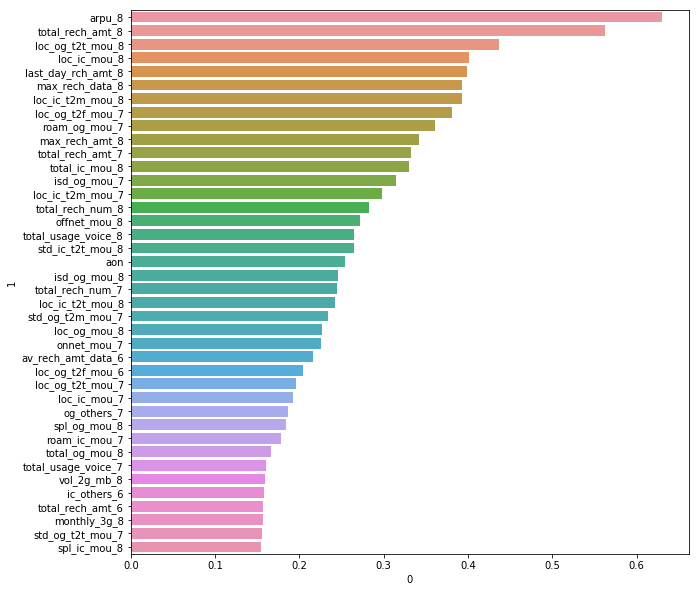

In [73]:
# Plotting top 40 features 
features = list(zip(abs(searchCV.coef_[0]),df_data.drop(['churn'], axis = 1).columns))
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=0, y=1, data=pd.DataFrame(sorted(features, reverse=True)[:40]))
plt.show()

---

### Using Decision Trees to identify indicators of churn

In [74]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=1000, min_samples_split=1000)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [75]:
# Making predictions
predictions = dt_default.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      8046
           1       0.70      0.75      0.72      8046

   micro avg       0.72      0.72      0.72     16092
   macro avg       0.72      0.72      0.72     16092
weighted avg       0.72      0.72      0.72     16092

Accuracy for the test dataset 71.6%
ROC for the test dataset 71.6%


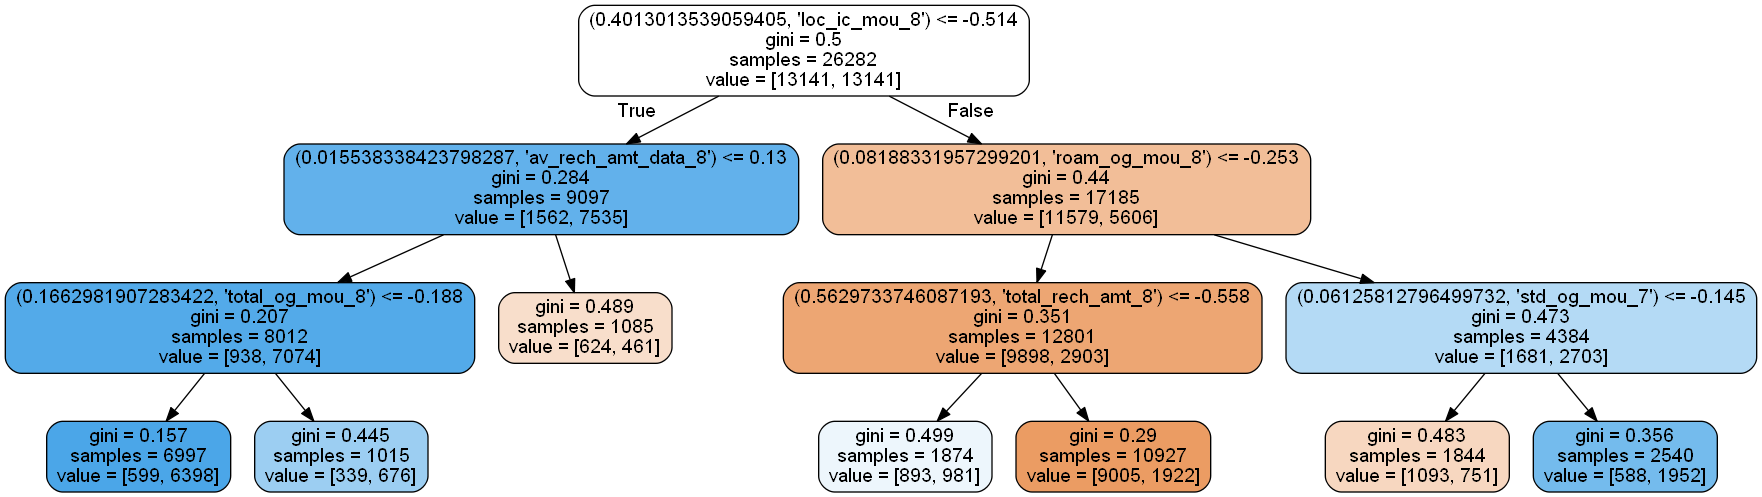

In [76]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data, feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

---

### Using Random Forest to identify the indicators of churn

In [77]:
# Making final model with best parameters obtained in previous HyperParameter optimization
rfc_final = RandomForestClassifier(max_depth=14, random_state=100, oob_score=True, class_weight="balanced_subsample")

# Training model from Training Dataset
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=True, random_state=100,
            verbose=0, warm_start=False)

In [78]:
# Making predictions on Test Dataset
predictions=rfc_final.predict(X_test)

# Detailed report of classification done by model
print(metrics.classification_report(y_test, predictions))
print(f'Accuracy for the test dataset {metrics.accuracy_score(y_test, predictions):.1%}')
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
print(f'ROC for the test dataset {metrics.auc(fpr, tpr):.1%}')

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      8046
           1       0.95      0.80      0.87      8046

   micro avg       0.88      0.88      0.88     16092
   macro avg       0.89      0.88      0.88     16092
weighted avg       0.89      0.88      0.88     16092

Accuracy for the test dataset 87.9%
ROC for the test dataset 87.9%


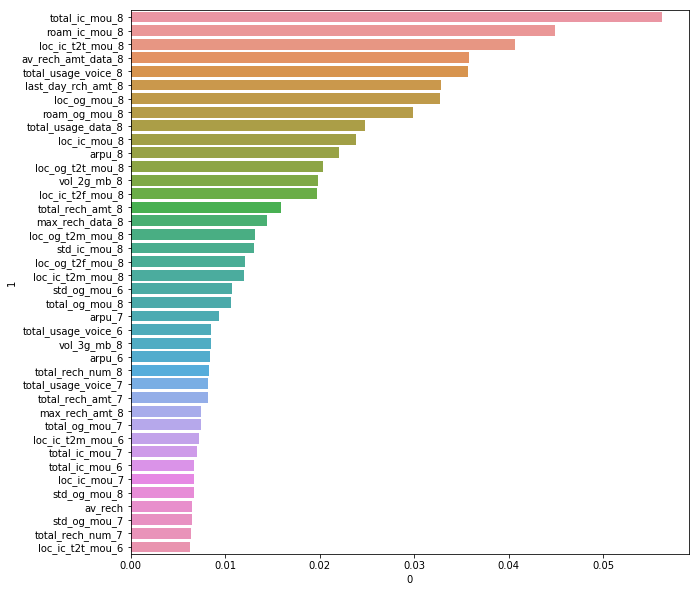

In [79]:
# Plotting top 40 features 
features = list(zip(abs(rfc_final.feature_importances_),df_data.drop(['churn'], axis = 1).columns))
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=0, y=1, data=pd.DataFrame(sorted(features, reverse=True)[:40]))
plt.show()

---

### Recommendation of strategies to manage customer churn

The following are recommendations based on analysis for the Telecom firm to avoid the customer churn:
1. Customers **reducing/nullifying their calls** (mou: incoming + outgoing) during the 'action' phase are likely to churn. *(From EDA, Logistic Regression Model, Decision Tree Model, Random Forest Model)*
    * The firm can give them offer of *free calling* to retain them
    * The firm can give them offer to *recharge at lesser cost* to avoid churn


2. Customers **reducing/nullifying the monthly recharge** amount/count during 'action' phase are likely to churn. *(From EDA, Logistic Regression Model, Decision Tree Model, Random Forest Model)*
    * The firm can give them offer to *recharge at lesser cost* to avoid churn


3. Customers who have **lesser AON** (Lesser Days on our operator's network) are likely to churn. *(From EDA, Logistic Regression Model)*
    * The firm can provide *incremental benifits* to customers, e.g. providing more data per day at same price for high AON customers
    * The firm can promise a *revard for successful completion of certain days/months/years* on the Network


4. Customers who have **spent lesser on data recharge** over 'good' phase as well as 'action' phase are likely to churn. *(From EDA)*
    * The firm can *extend their data benifits* so as to get them use more data


5. Customers who have **consumed lesser data** in the 'action' phase are likely to churn. *(From EDA)*
    * The firm can provide them *complementry services like music/movie subscription* that involve the user to use more data



---